<!-- <div>
    <img src="attachment:image.png" align="right" width="150">
</div> -->

# <font color='#5D6D7E '> <center >Forecasting - AXS</center>
    
### Master Degree Program in Data Science and Advanced Analytics    
    
### <font color='#5D6D7E '> Business Cases with Data Science Project: 
> #### Group AA

### <font color='#5D6D7E '> Done by:
> #### - Beatriz Martins Selidónio Gomes, m20210545
> #### - Catarina Inês Lopes Garcez, m20210547    
> #### - Diogo André Domingues Pires, m20201076  
> #### - Rodrigo Faísca Guedes, m20210587 

---

<div>
    
# Table of Content<a class="anchor"><a id='toc'></a>

### <font color='#5D6D7E '> Import and Data Integration  
- [<font color='#000000'>Import the needed Libraries</font>](#third-bullet)<br> 

### <font color='#5D6D7E '> Data Exploration and Understanding    
- [<font color='#000000'>Initial Analysis (EDA - Exploratory Data Analysis)</font>](#fifth-bullet)<br> 
- [<font color='#000000'>Variables Distribution</font>](#seventh-bullet)<br>    
    
### <font color='#5D6D7E '> Data Preparation      
- [<font color='#000000'>Data Transformation</font>](#eighth-bullet)<br>
    
### <font color='#5D6D7E '> Modelling    
- [<font color='#000000'>Building LSTM Model</font>](#twentysecond-bullet)<br>   
- [<font color='#000000'>Get Best Parameters for LSTM</font>](#twentythird-bullet)<br> 
- [<font color='#000000'>Run the LSTM Model and Get Predictions</font>](#twentyfourth-bullet)<br>   
- [<font color='#000000'>Recursive Predictions</font>](#twentysixth-bullet)<br>   
  

</div>

---

# Import and Data Integration


## <font color='#5D6D7E '>Import the needed Libraries</font> <a class="anchor" id="third-bullet"></a>
  [Back to TOC](#toc)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# # Remember: library imports are ALWAYS at the top of the script, no exceptions!
# import sqlite3
# import os
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()
# from math import ceil
# import matplotlib.cm as cm
# import joblib
# import random
# from collections import Counter
# import datetime

# from collections import Counter
# from sklearn.preprocessing import StandardScaler

# #  RFE and Models
# # explore the number of selected features for RFE
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.feature_selection import RFE
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot
# # report which features were selected by RFE
# from sklearn.datasets import make_classification
# from sklearn.feature_selection import RFE
# from sklearn.tree import DecisionTreeClassifier
# import sklearn
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import LabelEncoder
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.linear_model import LassoCV
# from sklearn import preprocessing
# from sklearn.preprocessing import RobustScaler
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.model_selection import KFold
# from sklearn.model_selection import RepeatedKFold
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import f1_score 
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.svm import SVC
# from sklearn import metrics
# from sklearn.model_selection import StratifiedKFold

# Data Exploration and Understanding

## <font color='#5D6D7E'>Initial Analysis (EDA - Exploratory Data Analysis) </font> <a class="anchor" id="fifth-bullet"></a>
  [Back to TOC](#toc)


In [2]:
df = pd.read_csv('../data/data_aux/df_AXS.csv')
df

,Date,AXS-USD_ADJCLOSE,AXS-USD_CLOSE,AXS-USD_HIGH,AXS-USD_LOW,AXS-USD_OPEN,AXS-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1821,2022-04-21,45.097389,45.097389,47.908173,44.620983,46.146866,315254265.0
1822,2022-04-22,45.963348,45.963348,46.514893,44.898846,45.084476,293223333.0
1823,2022-04-23,45.180782,45.180782,46.072273,45.054134,45.955498,185825882.0
1824,2022-04-24,44.369541,44.369541,45.520817,44.332603,45.171925,171259555.0


### Data Types

In [3]:
# Get to know the number of instances and Features, the DataTypes and if there are missing values in each Feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1826 non-null   object 
 1   AXS-USD_ADJCLOSE  538 non-null    float64
 2   AXS-USD_CLOSE     538 non-null    float64
 3   AXS-USD_HIGH      538 non-null    float64
 4   AXS-USD_LOW       538 non-null    float64
 5   AXS-USD_OPEN      538 non-null    float64
 6   AXS-USD_VOLUME    538 non-null    float64
dtypes: float64(6), object(1)
memory usage: 100.0+ KB


### Missing Values

In [4]:
# Count the number of missing values for each Feature
df.isna().sum().to_frame().rename(columns={0: 'Count Missing Values'})

,Count Missing Values
Date,0
AXS-USD_ADJCLOSE,1288
AXS-USD_CLOSE,1288
AXS-USD_HIGH,1288
AXS-USD_LOW,1288
AXS-USD_OPEN,1288
AXS-USD_VOLUME,1288


### Descriptive Statistics

In [5]:
# Descriptive Statistics Table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AXS-USD_ADJCLOSE,538.0,4.368895e+01,4.521039e+01,0.135104,3.787297e+00,4.237009e+01,6.965252e+01,1.603593e+02
AXS-USD_CLOSE,538.0,4.368895e+01,4.521039e+01,0.135104,3.787297e+00,4.237009e+01,6.965252e+01,1.603593e+02
AXS-USD_HIGH,538.0,4.606852e+01,4.751994e+01,0.149547,4.056442e+00,4.493683e+01,7.382753e+01,1.653691e+02
AXS-USD_LOW,538.0,4.164627e+01,4.345773e+01,0.123431,3.386940e+00,3.822049e+01,6.694265e+01,1.542171e+02
AXS-USD_OPEN,538.0,4.362574e+01,4.527274e+01,0.135104,3.740667e+00,4.228959e+01,6.962919e+01,1.606206e+02
AXS-USD_VOLUME,538.0,4.358642e+08,7.423602e+08,579626.000000,2.186772e+07,2.372675e+08,5.276080e+08,6.680962e+09


In [6]:
# settings to display all columns
pd.set_option("display.max_columns", None)

# display the dataframe head
df.sample(n=10)

,Date,AXS-USD_ADJCLOSE,AXS-USD_CLOSE,AXS-USD_HIGH,AXS-USD_LOW,AXS-USD_OPEN,AXS-USD_VOLUME
1644,2021-10-26,128.990448,128.990448,137.963181,127.372864,131.798889,693706833.0
204,2017-11-16,NaN,NaN,NaN,NaN,NaN,NaN
583,2018-11-30,NaN,NaN,NaN,NaN,NaN,NaN
1115,2020-05-15,NaN,NaN,NaN,NaN,NaN,NaN
752,2019-05-18,NaN,NaN,NaN,NaN,NaN,NaN
562,2018-11-09,NaN,NaN,NaN,NaN,NaN,NaN
1106,2020-05-06,NaN,NaN,NaN,NaN,NaN,NaN
333,2018-03-25,NaN,NaN,NaN,NaN,NaN,NaN
935,2019-11-17,NaN,NaN,NaN,NaN,NaN,NaN
1127,2020-05-27,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#CHECK ROWS THAT HAVE ANY MISSING VALUE IN ONE OF THE COLUMNS
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,Date,AXS-USD_ADJCLOSE,AXS-USD_CLOSE,AXS-USD_HIGH,AXS-USD_LOW,AXS-USD_OPEN,AXS-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1283,2020-10-30,NaN,NaN,NaN,NaN,NaN,NaN
1284,2020-10-31,NaN,NaN,NaN,NaN,NaN,NaN
1285,2020-11-01,NaN,NaN,NaN,NaN,NaN,NaN
1286,2020-11-02,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#FILTER OUT ROWS THAT ARE MISSING INFORMATION
df = df[~row_has_NaN]
df.reset_index(inplace=True, drop=True)
df

,Date,AXS-USD_ADJCLOSE,AXS-USD_CLOSE,AXS-USD_HIGH,AXS-USD_LOW,AXS-USD_OPEN,AXS-USD_VOLUME
0,2020-11-04,0.145949,0.145949,0.191121,0.141809,0.179801,16344570.0
1,2020-11-05,0.135104,0.135104,0.150565,0.126469,0.145951,4948417.0
2,2020-11-06,0.143164,0.143164,0.149547,0.123431,0.135104,3148629.0
3,2020-11-07,0.141056,0.141056,0.168470,0.134455,0.143189,1987416.0
4,2020-11-08,0.198251,0.198251,0.239455,0.139401,0.141021,9484360.0
...,...,...,...,...,...,...,...
533,2022-04-21,45.097389,45.097389,47.908173,44.620983,46.146866,315254265.0
534,2022-04-22,45.963348,45.963348,46.514893,44.898846,45.084476,293223333.0
535,2022-04-23,45.180782,45.180782,46.072273,45.054134,45.955498,185825882.0
536,2022-04-24,44.369541,44.369541,45.520817,44.332603,45.171925,171259555.0


# Data Preparation


## <font color='#5D6D7E'>Data Transformation</font> <a class="anchor" id="eighth-bullet"></a>
  [Back to TOC](#toc)

 __`Duplicates`__

In [9]:
# Checking if exist duplicated observations
print(f'\033[1m' + "Number of duplicates: " + '\033[0m', df.duplicated().sum())  

Number of duplicates:  0


 __`Convert Date to correct format`__

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df

,Date,AXS-USD_ADJCLOSE,AXS-USD_CLOSE,AXS-USD_HIGH,AXS-USD_LOW,AXS-USD_OPEN,AXS-USD_VOLUME
0,2020-11-04,0.145949,0.145949,0.191121,0.141809,0.179801,16344570.0
1,2020-11-05,0.135104,0.135104,0.150565,0.126469,0.145951,4948417.0
2,2020-11-06,0.143164,0.143164,0.149547,0.123431,0.135104,3148629.0
3,2020-11-07,0.141056,0.141056,0.168470,0.134455,0.143189,1987416.0
4,2020-11-08,0.198251,0.198251,0.239455,0.139401,0.141021,9484360.0
...,...,...,...,...,...,...,...
533,2022-04-21,45.097389,45.097389,47.908173,44.620983,46.146866,315254265.0
534,2022-04-22,45.963348,45.963348,46.514893,44.898846,45.084476,293223333.0
535,2022-04-23,45.180782,45.180782,46.072273,45.054134,45.955498,185825882.0
536,2022-04-24,44.369541,44.369541,45.520817,44.332603,45.171925,171259555.0


 __`Get percentual difference between open and close values and low and high values`__

In [11]:
df['pctDiff_CloseOpen'] = abs((df[df.columns[2]]-df[df.columns[5]])/df[df.columns[2]])*100
df['pctDiff_HighLow'] = abs((df[df.columns[3]]-df[df.columns[4]])/df[df.columns[4]])*100
df.head()

,Date,AXS-USD_ADJCLOSE,AXS-USD_CLOSE,AXS-USD_HIGH,AXS-USD_LOW,AXS-USD_OPEN,AXS-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
0,2020-11-04,0.145949,0.145949,0.191121,0.141809,0.179801,16344570.0,23.194400,34.773530
1,2020-11-05,0.135104,0.135104,0.150565,0.126469,0.145951,4948417.0,8.028631,19.052888
2,2020-11-06,0.143164,0.143164,0.149547,0.123431,0.135104,3148629.0,5.629903,21.158379
3,2020-11-07,0.141056,0.141056,0.168470,0.134455,0.143189,1987416.0,1.512163,25.298428
4,2020-11-08,0.198251,0.198251,0.239455,0.139401,0.141021,9484360.0,28.867445,71.774229


In [12]:
def plot_coinValue(df):
    
    #Get coin name
    coin_name = df.columns[2].split('-')[0]
    
    #Get date and coin value
    x = df['Date']
    y = df[df.columns[2]] # ADA-USD_CLOSE
    
    #Get the volume of trades
    v = df[df.columns[-3]]/1e9
    
    #Get percentual diferences
    y2 = df[df.columns[-1]] # pctDiff_HighLow
    y1= df[df.columns[-2]]  # pctDiff_CloseOpen
    
    fig, axs = plt.subplots(3, 1, figsize=(12,14))
    
    axs[0].plot(x, y)
    axs[2].plot(x, v)
    
    # plotting the line 1 points 
    axs[1].plot(x, y1, label = "Close/Open")

    # plotting the line 2 points 
    axs[1].plot(x, y2, label = "High/Low")
    axs[1].legend()
    
    axs[0].title.set_text('Time Evolution of '+ coin_name)
    axs[0].set(xlabel="", ylabel="Close Value in USD$")
    
    axs[2].title.set_text('Volume of trades of '+ coin_name)
    axs[2].set(xlabel="", ylabel="Total number of trades in billions")
    
    
    axs[1].title.set_text('Daily Market percentual differences of '+ coin_name)
    axs[1].set(xlabel="", ylabel="Percentage (%)")
    
    plt.savefig('../analysis/'+coin_name +'_stats'+'.png')
    
    return coin_name

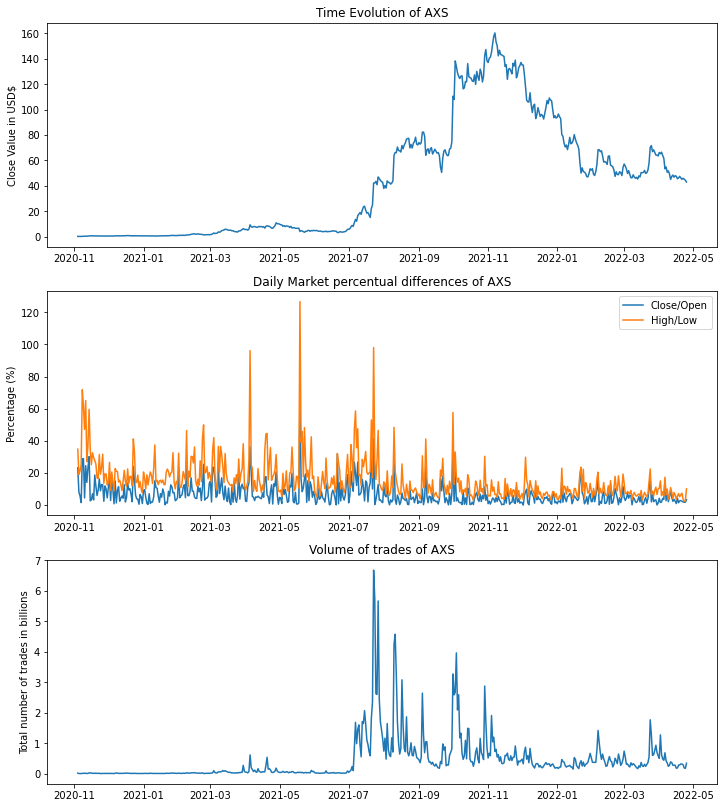

In [13]:
coin_name = plot_coinValue(df)

In [14]:
#FILTER DATASET
df = df.loc[df['Date']>= '2021-10-01'] # 2021-07-01
df

,Date,AXS-USD_ADJCLOSE,AXS-USD_CLOSE,AXS-USD_HIGH,AXS-USD_LOW,AXS-USD_OPEN,AXS-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
331,2021-10-01,110.539093,110.539093,117.026787,74.249603,74.611092,3.272757e+09,32.502530,57.612676
332,2021-10-02,107.941734,107.941734,119.921448,106.400620,110.410843,2.587818e+09,2.287446,12.707471
333,2021-10-03,138.318146,138.318146,138.318146,103.990822,107.963425,2.673087e+09,21.945581,33.009955
334,2021-10-04,133.951370,133.951370,155.084488,131.956909,137.372620,3.964783e+09,2.554098,17.526614
335,2021-10-05,128.987259,128.987259,145.702011,127.531685,134.723068,2.090557e+09,4.446803,14.247696
...,...,...,...,...,...,...,...,...,...
533,2022-04-21,45.097389,45.097389,47.908173,44.620983,46.146866,3.152543e+08,2.327134,7.366914
534,2022-04-22,45.963348,45.963348,46.514893,44.898846,45.084476,2.932233e+08,1.912115,3.599306
535,2022-04-23,45.180782,45.180782,46.072273,45.054134,45.955498,1.858259e+08,1.714701,2.259812
536,2022-04-24,44.369541,44.369541,45.520817,44.332603,45.171925,1.712596e+08,1.808410,2.680225


# Modelling


## <font color='#5D6D7E'>Building LSTM Model</font> <a class="anchor" id="twentysecond-bullet"></a>
  [Back to TOC](#toc)

## Strategy

Create a DF (windowed_df) where the middle columns will correspond to the close values of X days before the target date and the final column will correspond to the close value of the target date. Use these values for prediction and play with the value of X

In [15]:
def get_windowed_df(X, df):
    start_Date = df['Date'] + pd.Timedelta(days=X)
    
    perm = np.zeros((1,X+1))
    
    #Get labels for DataFrame
    j=1
    labels=[]
    
    while j <= X:
        label = 'closeValue_' + str(j) + 'daysBefore'
        labels.append(label)
        
        j+=1
 
    labels.append('closeValue')
    
    for i in range(X,df.shape[0]):
        temp = np.zeros((1,X+1))
        
        #Date for i-th day
        #temp[0,0] = df.iloc[i]['Date']
        
        #Close values for k days before
        for k in range(X):           
            temp[0,k] = df.iloc[i-k-1,2]
            
        #Close value for i-th date
        temp[0,-1] = df.iloc[i,2]
        

        #Add values to the permanent frame
        perm = np.vstack((perm,temp))
        
        #Get the array in dataframe form
        windowed_df = pd.DataFrame(perm[1:,:], columns = labels)
        
    return windowed_df

In [16]:
#Get the dataframe and append the dates
windowed_df = get_windowed_df(10, df)
windowed_df['Date'] = df.iloc[10:]['Date'].reset_index(drop=True)
windowed_df

,closeValue_1daysBefore,closeValue_2daysBefore,closeValue_3daysBefore,closeValue_4daysBefore,closeValue_5daysBefore,closeValue_6daysBefore,closeValue_7daysBefore,closeValue_8daysBefore,closeValue_9daysBefore,closeValue_10daysBefore,closeValue,Date
0,116.322701,126.545799,126.367287,124.509331,126.216606,128.987259,133.951370,138.318146,107.941734,110.539093,117.017021,2021-10-11
1,117.017021,116.322701,126.545799,126.367287,124.509331,126.216606,128.987259,133.951370,138.318146,107.941734,122.065582,2021-10-12
2,122.065582,117.017021,116.322701,126.545799,126.367287,124.509331,126.216606,128.987259,133.951370,138.318146,121.766754,2021-10-13
3,121.766754,122.065582,117.017021,116.322701,126.545799,126.367287,124.509331,126.216606,128.987259,133.951370,136.212082,2021-10-14
4,136.212082,121.766754,122.065582,117.017021,116.322701,126.545799,126.367287,124.509331,126.216606,128.987259,125.787872,2021-10-15
...,...,...,...,...,...,...,...,...,...,...,...,...
192,46.147995,47.441418,46.212879,45.541279,47.501385,47.938419,46.771194,48.443615,47.346897,45.047264,45.097389,2022-04-21
193,45.097389,46.147995,47.441418,46.212879,45.541279,47.501385,47.938419,46.771194,48.443615,47.346897,45.963348,2022-04-22
194,45.963348,45.097389,46.147995,47.441418,46.212879,45.541279,47.501385,47.938419,46.771194,48.443615,45.180782,2022-04-23
195,45.180782,45.963348,45.097389,46.147995,47.441418,46.212879,45.541279,47.501385,47.938419,46.771194,44.369541,2022-04-24


In [17]:
#Get the X,y and dates into a numpy array to apply on a model

def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, -1]

    middle_matrix = df_as_np[:, 0:-2]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    Y = df_as_np[:, -2]

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((197,), (197, 10, 1), (197,))

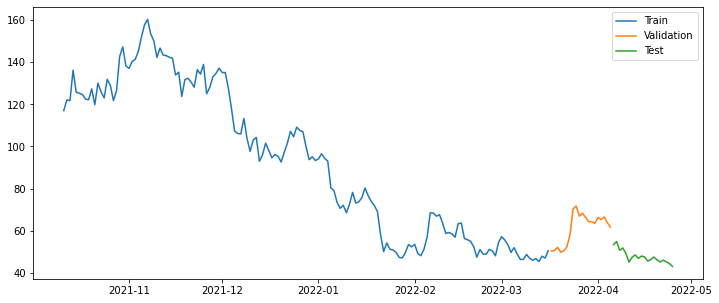

In [18]:
#Partition for train, validation and test

q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

fig,axs = plt.subplots(1, 1, figsize=(12,5))

#Plot the partitions
axs.plot(dates_train, y_train)
axs.plot(dates_val, y_val)
axs.plot(dates_test, y_test)

axs.legend(['Train', 'Validation', 'Test'])

fig.savefig('../analysis/'+coin_name +'_partition'+'.png')

## <font color='#5D6D7E'>Get Best Parameters for LSTM</font> <a class="anchor" id="twentythird-bullet"></a>
  [Back to TOC](#toc)

In [19]:
#!pip install tensorflow

In [20]:
#import os
#os.environ['PYTHONHASHSEED']= '0'
#import numpy as np
#np.random.seed(1)
#import random as rn
#rn.seed(1)
#import tensorflow as tf
#tf.random.set_seed(1)
#
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras import layers
#from sklearn.metrics import mean_squared_error
#
## Function to create LSTM model and compute the MSE value for the given parameters
#def check_model(X_train, y_train, X_val, y_val, X_test, y_test, learning_rate,epoch,batch):
#    
#    # create model
#    model = Sequential([layers.Input((10, 1)),
#                        layers.LSTM(64),
#                        layers.Dense(32, activation='relu'),
#                        layers.Dense(32, activation='relu'),
#                        layers.Dense(1)])
#    # Compile model
#    model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate), metrics=['mean_absolute_error'])
#    
#    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epoch, shuffle=False, batch_size=batch, verbose=2)
#    
#    test_predictions = model.predict(X_test).flatten()
#    
#    LSTM_mse = mean_squared_error(y_test, test_predictions)
#    
#    return LSTM_mse
#
##Function that iterates the different parameters and gets the ones corresponding to the lowest MSE score.
#def search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test):
#    
#    best_score = float('inf')
#    
#    for b in batch_size:
#        for e in epochs:
#            for l in learn_rate:
#                print('Batch Size: ' + str(b))
#                print('Number of Epochs: ' + str(e))
#                print('Value of Learning Rate: ' + str(l))
#                try:
#                    mse = check_model(X_train, y_train, X_val, y_val, X_test, y_test,l,e,b)
#                    print('MSE=%.3f' % (mse))
#                    if mse < best_score:
#                        best_score = mse
#                        top_params = [b, e, l]
#                except:
#                    continue
#                    
#    print('Best MSE=%.3f' % (best_score))
#    print('Optimal Batch Size: ' + str(top_params[0]))
#    print('Optimal Number of Epochs: ' + str(top_params[1]))
#    print('Optimal Value of Learning Rate: ' + str(top_params[2]))
#                        
#
## define parameters
#batch_size = [10, 100, 1000]
#epochs = [50, 100]
#learn_rate = np.linspace(0.001,0.1, num=10)
#
#warnings.filterwarnings("ignore")
#search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test)

Batch Size: 10
Number of Epochs: 50
Value of Learning Rate: 0.001
Epoch 1/50
16/16 - 1s - loss: 9896.6201 - mean_absolute_error: 92.8585 - val_loss: 3714.0884 - val_mean_absolute_error: 60.5093 - 1s/epoch - 93ms/step
Epoch 2/50
16/16 - 0s - loss: 9730.7178 - mean_absolute_error: 91.9841 - val_loss: 3610.9812 - val_mean_absolute_error: 59.6514 - 61ms/epoch - 4ms/step
Epoch 3/50
16/16 - 0s - loss: 9526.5127 - mean_absolute_error: 90.8053 - val_loss: 3426.2141 - val_mean_absolute_error: 58.0810 - 60ms/epoch - 4ms/step
Epoch 4/50
16/16 - 0s - loss: 9185.2100 - mean_absolute_error: 88.7666 - val_loss: 3103.9897 - val_mean_absolute_error: 55.2356 - 60ms/epoch - 4ms/step
Epoch 5/50
16/16 - 0s - loss: 8615.4775 - mean_absolute_error: 85.2024 - val_loss: 2577.2417 - val_mean_absolute_error: 50.2361 - 61ms/epoch - 4ms/step
Epoch 6/50
16/16 - 0s - loss: 7692.6216 - mean_absolute_error: 79.1033 - val_loss: 1799.7312 - val_mean_absolute_error: 41.7627 - 62ms/epoch - 4ms/step
Epoch 7/50
16/16 - 0s -

Epoch 5/50
16/16 - 0s - loss: 1555.3595 - mean_absolute_error: 35.5657 - val_loss: 428.5826 - val_mean_absolute_error: 19.3983 - 58ms/epoch - 4ms/step
Epoch 6/50
16/16 - 0s - loss: 1786.7557 - mean_absolute_error: 38.1269 - val_loss: 492.4965 - val_mean_absolute_error: 20.9922 - 55ms/epoch - 3ms/step
Epoch 7/50
16/16 - 0s - loss: 1658.9266 - mean_absolute_error: 36.6503 - val_loss: 389.4494 - val_mean_absolute_error: 18.4079 - 55ms/epoch - 3ms/step
Epoch 8/50
16/16 - 0s - loss: 1718.5170 - mean_absolute_error: 37.1851 - val_loss: 342.8245 - val_mean_absolute_error: 17.0711 - 56ms/epoch - 4ms/step
Epoch 9/50
16/16 - 0s - loss: 1749.1035 - mean_absolute_error: 37.6599 - val_loss: 370.2393 - val_mean_absolute_error: 17.8722 - 56ms/epoch - 4ms/step
Epoch 10/50
16/16 - 0s - loss: 1685.4050 - mean_absolute_error: 36.8530 - val_loss: 406.1199 - val_mean_absolute_error: 18.8144 - 59ms/epoch - 4ms/step
Epoch 11/50
16/16 - 0s - loss: 1707.6594 - mean_absolute_error: 37.2834 - val_loss: 596.6997 

Epoch 9/50
16/16 - 0s - loss: 2210.9736 - mean_absolute_error: 42.0102 - val_loss: 175.2065 - val_mean_absolute_error: 11.0741 - 56ms/epoch - 4ms/step
Epoch 10/50
16/16 - 0s - loss: 2301.0393 - mean_absolute_error: 43.3514 - val_loss: 351.8109 - val_mean_absolute_error: 17.3119 - 54ms/epoch - 3ms/step
Epoch 11/50
16/16 - 0s - loss: 2081.0649 - mean_absolute_error: 41.2237 - val_loss: 411.5178 - val_mean_absolute_error: 18.9661 - 57ms/epoch - 4ms/step
Epoch 12/50
16/16 - 0s - loss: 1960.2793 - mean_absolute_error: 39.8359 - val_loss: 51.8272 - val_mean_absolute_error: 6.1098 - 55ms/epoch - 3ms/step
Epoch 13/50
16/16 - 0s - loss: 1584.2737 - mean_absolute_error: 32.2204 - val_loss: 459.4417 - val_mean_absolute_error: 20.0848 - 55ms/epoch - 3ms/step
Epoch 14/50
16/16 - 0s - loss: 2002.6200 - mean_absolute_error: 40.0172 - val_loss: 76.0583 - val_mean_absolute_error: 7.7901 - 56ms/epoch - 4ms/step
Epoch 15/50
16/16 - 0s - loss: 1881.5978 - mean_absolute_error: 37.6963 - val_loss: 91.4667 -

16/16 - 0s - loss: 2258.8101 - mean_absolute_error: 42.7306 - val_loss: 133.2799 - val_mean_absolute_error: 9.1808 - 56ms/epoch - 4ms/step
Epoch 14/50
16/16 - 0s - loss: 2464.5139 - mean_absolute_error: 44.8562 - val_loss: 312.1577 - val_mean_absolute_error: 16.1217 - 60ms/epoch - 4ms/step
Epoch 15/50
16/16 - 0s - loss: 2194.8716 - mean_absolute_error: 42.4434 - val_loss: 323.2286 - val_mean_absolute_error: 16.6684 - 56ms/epoch - 4ms/step
Epoch 16/50
16/16 - 0s - loss: 1930.4792 - mean_absolute_error: 39.3166 - val_loss: 310.9870 - val_mean_absolute_error: 16.0843 - 57ms/epoch - 4ms/step
Epoch 17/50
16/16 - 0s - loss: 2079.9631 - mean_absolute_error: 41.1313 - val_loss: 272.1564 - val_mean_absolute_error: 14.9703 - 56ms/epoch - 4ms/step
Epoch 18/50
16/16 - 0s - loss: 1980.2096 - mean_absolute_error: 38.9992 - val_loss: 51.0259 - val_mean_absolute_error: 6.3242 - 57ms/epoch - 4ms/step
Epoch 19/50
16/16 - 0s - loss: 1457.5277 - mean_absolute_error: 34.3068 - val_loss: 110.5462 - val_mean

Epoch 17/50
16/16 - 0s - loss: 2473.4570 - mean_absolute_error: 45.0375 - val_loss: 186.8779 - val_mean_absolute_error: 11.5822 - 56ms/epoch - 4ms/step
Epoch 18/50
16/16 - 0s - loss: 2515.2336 - mean_absolute_error: 45.3884 - val_loss: 233.7084 - val_mean_absolute_error: 13.4529 - 56ms/epoch - 4ms/step
Epoch 19/50
16/16 - 0s - loss: 2416.7832 - mean_absolute_error: 44.5280 - val_loss: 215.7799 - val_mean_absolute_error: 12.7691 - 56ms/epoch - 4ms/step
Epoch 20/50
16/16 - 0s - loss: 2439.5623 - mean_absolute_error: 44.7144 - val_loss: 254.3679 - val_mean_absolute_error: 14.1999 - 58ms/epoch - 4ms/step
Epoch 21/50
16/16 - 0s - loss: 2364.8140 - mean_absolute_error: 44.0513 - val_loss: 242.9879 - val_mean_absolute_error: 13.7934 - 57ms/epoch - 4ms/step
Epoch 22/50
16/16 - 0s - loss: 2374.2495 - mean_absolute_error: 44.1216 - val_loss: 274.6766 - val_mean_absolute_error: 14.8979 - 57ms/epoch - 4ms/step
Epoch 23/50
16/16 - 0s - loss: 2316.4480 - mean_absolute_error: 43.5998 - val_loss: 268.

Epoch 16/50
16/16 - 0s - loss: 3547.3755 - mean_absolute_error: 52.8761 - val_loss: 457.2584 - val_mean_absolute_error: 20.1129 - 59ms/epoch - 4ms/step
Epoch 17/50
16/16 - 0s - loss: 2117.1411 - mean_absolute_error: 41.3998 - val_loss: 56.1874 - val_mean_absolute_error: 6.9929 - 60ms/epoch - 4ms/step
Epoch 18/50
16/16 - 0s - loss: 3264.4849 - mean_absolute_error: 51.1517 - val_loss: 402.8758 - val_mean_absolute_error: 18.7122 - 57ms/epoch - 4ms/step
Epoch 19/50
16/16 - 0s - loss: 2187.6675 - mean_absolute_error: 41.9808 - val_loss: 56.1549 - val_mean_absolute_error: 6.0107 - 56ms/epoch - 4ms/step
Epoch 20/50
16/16 - 0s - loss: 2957.0813 - mean_absolute_error: 48.6078 - val_loss: 206.8599 - val_mean_absolute_error: 12.4149 - 58ms/epoch - 4ms/step
Epoch 21/50
16/16 - 0s - loss: 2455.9451 - mean_absolute_error: 44.4309 - val_loss: 53.6345 - val_mean_absolute_error: 6.1906 - 57ms/epoch - 4ms/step
Epoch 22/50
16/16 - 0s - loss: 3013.8115 - mean_absolute_error: 48.8014 - val_loss: 310.4291 -

Epoch 15/50
16/16 - 0s - loss: 2353.6816 - mean_absolute_error: 43.8521 - val_loss: 114.7052 - val_mean_absolute_error: 8.2715 - 56ms/epoch - 4ms/step
Epoch 16/50
16/16 - 0s - loss: 2699.6038 - mean_absolute_error: 47.0501 - val_loss: 296.0611 - val_mean_absolute_error: 15.5990 - 56ms/epoch - 4ms/step
Epoch 17/50
16/16 - 0s - loss: 2317.0022 - mean_absolute_error: 43.5685 - val_loss: 157.4129 - val_mean_absolute_error: 10.2626 - 57ms/epoch - 4ms/step
Epoch 18/50
16/16 - 0s - loss: 2557.1599 - mean_absolute_error: 45.8080 - val_loss: 307.5757 - val_mean_absolute_error: 15.9639 - 60ms/epoch - 4ms/step
Epoch 19/50
16/16 - 0s - loss: 2282.6431 - mean_absolute_error: 43.2716 - val_loss: 200.1611 - val_mean_absolute_error: 12.1421 - 56ms/epoch - 4ms/step
Epoch 20/50
16/16 - 0s - loss: 2444.0674 - mean_absolute_error: 44.7833 - val_loss: 318.8015 - val_mean_absolute_error: 16.3117 - 57ms/epoch - 4ms/step
Epoch 21/50
16/16 - 0s - loss: 2250.3196 - mean_absolute_error: 42.9793 - val_loss: 239.6

Epoch 19/50
16/16 - 0s - loss: 2370.1221 - mean_absolute_error: 44.1158 - val_loss: 353.7512 - val_mean_absolute_error: 17.3499 - 58ms/epoch - 4ms/step
Epoch 20/50
16/16 - 0s - loss: 2188.4282 - mean_absolute_error: 42.3922 - val_loss: 266.2419 - val_mean_absolute_error: 14.6120 - 60ms/epoch - 4ms/step
Epoch 21/50
16/16 - 0s - loss: 2292.6284 - mean_absolute_error: 43.3759 - val_loss: 357.0438 - val_mean_absolute_error: 17.4446 - 58ms/epoch - 4ms/step
Epoch 22/50
16/16 - 0s - loss: 2171.3721 - mean_absolute_error: 42.2293 - val_loss: 297.6389 - val_mean_absolute_error: 15.6495 - 58ms/epoch - 4ms/step
Epoch 23/50
16/16 - 0s - loss: 2235.3569 - mean_absolute_error: 42.8166 - val_loss: 361.2235 - val_mean_absolute_error: 17.5640 - 57ms/epoch - 4ms/step
Epoch 24/50
16/16 - 0s - loss: 2154.9648 - mean_absolute_error: 42.0688 - val_loss: 322.4605 - val_mean_absolute_error: 16.4234 - 58ms/epoch - 4ms/step
Epoch 25/50
16/16 - 0s - loss: 2192.4209 - mean_absolute_error: 42.3996 - val_loss: 366.

Epoch 23/50
16/16 - 0s - loss: 2654.2874 - mean_absolute_error: 46.1556 - val_loss: 448.7871 - val_mean_absolute_error: 19.9012 - 57ms/epoch - 4ms/step
Epoch 24/50
16/16 - 0s - loss: 2088.3508 - mean_absolute_error: 41.2578 - val_loss: 157.0281 - val_mean_absolute_error: 10.2456 - 56ms/epoch - 4ms/step
Epoch 25/50
16/16 - 0s - loss: 2471.9380 - mean_absolute_error: 44.7899 - val_loss: 438.2148 - val_mean_absolute_error: 19.6337 - 58ms/epoch - 4ms/step
Epoch 26/50
16/16 - 0s - loss: 2084.7463 - mean_absolute_error: 41.2880 - val_loss: 218.9436 - val_mean_absolute_error: 12.8923 - 57ms/epoch - 4ms/step
Epoch 27/50
16/16 - 0s - loss: 2330.4727 - mean_absolute_error: 43.6531 - val_loss: 428.5471 - val_mean_absolute_error: 19.3860 - 56ms/epoch - 4ms/step
Epoch 28/50
16/16 - 0s - loss: 2078.5276 - mean_absolute_error: 41.2930 - val_loss: 275.0719 - val_mean_absolute_error: 14.9111 - 57ms/epoch - 4ms/step
Epoch 29/50
16/16 - 0s - loss: 2228.2607 - mean_absolute_error: 42.7635 - val_loss: 421.

Epoch 27/50
16/16 - 0s - loss: 2633.2100 - mean_absolute_error: 46.4388 - val_loss: 315.9943 - val_mean_absolute_error: 16.2254 - 56ms/epoch - 4ms/step
Epoch 28/50
16/16 - 0s - loss: 2264.7598 - mean_absolute_error: 43.0488 - val_loss: 145.3122 - val_mean_absolute_error: 9.7140 - 59ms/epoch - 4ms/step
Epoch 29/50
16/16 - 0s - loss: 2560.3782 - mean_absolute_error: 45.8135 - val_loss: 317.6436 - val_mean_absolute_error: 16.2761 - 57ms/epoch - 4ms/step
Epoch 30/50
16/16 - 0s - loss: 2253.2354 - mean_absolute_error: 42.9649 - val_loss: 167.4037 - val_mean_absolute_error: 10.7085 - 57ms/epoch - 4ms/step
Epoch 31/50
16/16 - 0s - loss: 2495.0981 - mean_absolute_error: 45.2398 - val_loss: 320.4694 - val_mean_absolute_error: 16.3627 - 57ms/epoch - 4ms/step
Epoch 32/50
16/16 - 0s - loss: 2239.8579 - mean_absolute_error: 42.8522 - val_loss: 189.6380 - val_mean_absolute_error: 11.7007 - 57ms/epoch - 4ms/step
Epoch 33/50
16/16 - 0s - loss: 2435.8628 - mean_absolute_error: 44.7081 - val_loss: 324.3

Epoch 31/100
16/16 - 0s - loss: 130.7640 - mean_absolute_error: 8.8603 - val_loss: 131.7351 - val_mean_absolute_error: 9.0843 - 56ms/epoch - 4ms/step
Epoch 32/100
16/16 - 0s - loss: 129.6836 - mean_absolute_error: 8.8242 - val_loss: 131.2902 - val_mean_absolute_error: 9.0841 - 56ms/epoch - 4ms/step
Epoch 33/100
16/16 - 0s - loss: 129.5721 - mean_absolute_error: 8.8208 - val_loss: 128.9067 - val_mean_absolute_error: 8.9883 - 54ms/epoch - 3ms/step
Epoch 34/100
16/16 - 0s - loss: 128.7682 - mean_absolute_error: 8.7828 - val_loss: 128.6220 - val_mean_absolute_error: 8.9879 - 57ms/epoch - 4ms/step
Epoch 35/100
16/16 - 0s - loss: 128.3935 - mean_absolute_error: 8.7764 - val_loss: 126.6771 - val_mean_absolute_error: 8.9301 - 56ms/epoch - 4ms/step
Epoch 36/100
16/16 - 0s - loss: 127.9189 - mean_absolute_error: 8.7488 - val_loss: 126.1866 - val_mean_absolute_error: 8.9257 - 56ms/epoch - 4ms/step
Epoch 37/100
16/16 - 0s - loss: 127.3323 - mean_absolute_error: 8.7303 - val_loss: 124.8690 - val_me

Epoch 86/100
16/16 - 0s - loss: 109.8651 - mean_absolute_error: 7.9835 - val_loss: 97.4373 - val_mean_absolute_error: 8.6174 - 56ms/epoch - 4ms/step
Epoch 87/100
16/16 - 0s - loss: 108.9521 - mean_absolute_error: 7.9543 - val_loss: 94.3710 - val_mean_absolute_error: 8.5002 - 55ms/epoch - 3ms/step
Epoch 88/100
16/16 - 0s - loss: 108.1037 - mean_absolute_error: 7.9057 - val_loss: 98.3823 - val_mean_absolute_error: 8.6301 - 58ms/epoch - 4ms/step
Epoch 89/100
16/16 - 0s - loss: 109.3296 - mean_absolute_error: 7.9574 - val_loss: 97.7743 - val_mean_absolute_error: 8.6437 - 56ms/epoch - 4ms/step
Epoch 90/100
16/16 - 0s - loss: 107.9791 - mean_absolute_error: 7.9156 - val_loss: 88.3279 - val_mean_absolute_error: 8.2645 - 56ms/epoch - 4ms/step
Epoch 91/100
16/16 - 0s - loss: 105.8243 - mean_absolute_error: 7.8032 - val_loss: 100.3069 - val_mean_absolute_error: 8.6759 - 55ms/epoch - 3ms/step
Epoch 92/100
16/16 - 0s - loss: 111.4873 - mean_absolute_error: 8.0590 - val_loss: 98.1734 - val_mean_abs

Epoch 40/100
16/16 - 0s - loss: 217.5118 - mean_absolute_error: 11.4044 - val_loss: 116.5316 - val_mean_absolute_error: 9.2380 - 58ms/epoch - 4ms/step
Epoch 41/100
16/16 - 0s - loss: 223.4165 - mean_absolute_error: 11.3023 - val_loss: 146.7058 - val_mean_absolute_error: 10.1275 - 58ms/epoch - 4ms/step
Epoch 42/100
16/16 - 0s - loss: 224.6428 - mean_absolute_error: 11.4742 - val_loss: 128.0879 - val_mean_absolute_error: 9.5439 - 56ms/epoch - 4ms/step
Epoch 43/100
16/16 - 0s - loss: 221.7003 - mean_absolute_error: 11.3345 - val_loss: 134.3249 - val_mean_absolute_error: 9.7366 - 56ms/epoch - 4ms/step
Epoch 44/100
16/16 - 0s - loss: 211.7407 - mean_absolute_error: 11.1106 - val_loss: 124.0531 - val_mean_absolute_error: 9.4252 - 57ms/epoch - 4ms/step
Epoch 45/100
16/16 - 0s - loss: 197.5436 - mean_absolute_error: 10.7019 - val_loss: 121.1423 - val_mean_absolute_error: 9.3450 - 56ms/epoch - 4ms/step
Epoch 46/100
16/16 - 0s - loss: 185.2125 - mean_absolute_error: 10.3518 - val_loss: 119.1104 

Epoch 95/100
16/16 - 0s - loss: 176.0694 - mean_absolute_error: 9.9418 - val_loss: 128.1703 - val_mean_absolute_error: 9.5577 - 56ms/epoch - 4ms/step
Epoch 96/100
16/16 - 0s - loss: 176.3817 - mean_absolute_error: 9.9505 - val_loss: 127.9863 - val_mean_absolute_error: 9.5532 - 57ms/epoch - 4ms/step
Epoch 97/100
16/16 - 0s - loss: 176.1885 - mean_absolute_error: 9.9477 - val_loss: 127.6164 - val_mean_absolute_error: 9.5428 - 56ms/epoch - 4ms/step
Epoch 98/100
16/16 - 0s - loss: 175.6926 - mean_absolute_error: 9.9361 - val_loss: 127.5620 - val_mean_absolute_error: 9.5406 - 56ms/epoch - 4ms/step
Epoch 99/100
16/16 - 0s - loss: 175.3541 - mean_absolute_error: 9.9209 - val_loss: 128.9281 - val_mean_absolute_error: 9.5793 - 59ms/epoch - 4ms/step
Epoch 100/100
16/16 - 0s - loss: 176.0754 - mean_absolute_error: 9.9384 - val_loss: 128.8534 - val_mean_absolute_error: 9.5792 - 57ms/epoch - 4ms/step
MSE=31.029
Batch Size: 10
Number of Epochs: 100
Value of Learning Rate: 0.023000000000000003
Epoch 

Epoch 49/100
16/16 - 0s - loss: 1302.3165 - mean_absolute_error: 32.6766 - val_loss: 228.4304 - val_mean_absolute_error: 13.2552 - 59ms/epoch - 4ms/step
Epoch 50/100
16/16 - 0s - loss: 1253.2815 - mean_absolute_error: 30.8667 - val_loss: 135.4043 - val_mean_absolute_error: 9.7257 - 58ms/epoch - 4ms/step
Epoch 51/100
16/16 - 0s - loss: 1683.5433 - mean_absolute_error: 35.2522 - val_loss: 99.7882 - val_mean_absolute_error: 7.4957 - 57ms/epoch - 4ms/step
Epoch 52/100
16/16 - 0s - loss: 1125.7312 - mean_absolute_error: 30.5548 - val_loss: 260.1184 - val_mean_absolute_error: 14.4020 - 58ms/epoch - 4ms/step
Epoch 53/100
16/16 - 0s - loss: 1118.7699 - mean_absolute_error: 28.5932 - val_loss: 217.1555 - val_mean_absolute_error: 12.9143 - 57ms/epoch - 4ms/step
Epoch 54/100
16/16 - 0s - loss: 1813.1688 - mean_absolute_error: 36.0712 - val_loss: 240.3920 - val_mean_absolute_error: 12.5284 - 57ms/epoch - 4ms/step
Epoch 55/100
16/16 - 0s - loss: 919.3873 - mean_absolute_error: 24.2032 - val_loss: 1

Epoch 3/100
16/16 - 0s - loss: 3306.0791 - mean_absolute_error: 50.9485 - val_loss: 57.6134 - val_mean_absolute_error: 6.5468 - 66ms/epoch - 4ms/step
Epoch 4/100
16/16 - 0s - loss: 2028.7598 - mean_absolute_error: 39.7394 - val_loss: 53.8746 - val_mean_absolute_error: 6.7817 - 66ms/epoch - 4ms/step
Epoch 5/100
16/16 - 0s - loss: 2715.5732 - mean_absolute_error: 46.8910 - val_loss: 154.8268 - val_mean_absolute_error: 10.5699 - 60ms/epoch - 4ms/step
Epoch 6/100
16/16 - 0s - loss: 1942.3715 - mean_absolute_error: 38.9432 - val_loss: 79.1576 - val_mean_absolute_error: 6.3869 - 62ms/epoch - 4ms/step
Epoch 7/100
16/16 - 0s - loss: 2456.3455 - mean_absolute_error: 44.6759 - val_loss: 73.4294 - val_mean_absolute_error: 6.2676 - 65ms/epoch - 4ms/step
Epoch 8/100
16/16 - 0s - loss: 2676.4023 - mean_absolute_error: 46.7028 - val_loss: 428.7886 - val_mean_absolute_error: 19.3978 - 61ms/epoch - 4ms/step
Epoch 9/100
16/16 - 0s - loss: 1992.9930 - mean_absolute_error: 40.0416 - val_loss: 91.4404 - va

16/16 - 0s - loss: 309.2299 - mean_absolute_error: 13.8377 - val_loss: 73.4123 - val_mean_absolute_error: 7.9543 - 58ms/epoch - 4ms/step
Epoch 58/100
16/16 - 0s - loss: 292.8119 - mean_absolute_error: 12.6495 - val_loss: 119.4523 - val_mean_absolute_error: 9.4026 - 58ms/epoch - 4ms/step
Epoch 59/100
16/16 - 0s - loss: 317.0887 - mean_absolute_error: 14.0919 - val_loss: 73.5346 - val_mean_absolute_error: 7.9597 - 59ms/epoch - 4ms/step
Epoch 60/100
16/16 - 0s - loss: 295.2625 - mean_absolute_error: 12.8083 - val_loss: 107.5616 - val_mean_absolute_error: 9.0972 - 56ms/epoch - 4ms/step
Epoch 61/100
16/16 - 0s - loss: 306.6232 - mean_absolute_error: 13.7404 - val_loss: 75.3730 - val_mean_absolute_error: 8.0386 - 60ms/epoch - 4ms/step
Epoch 62/100
16/16 - 0s - loss: 287.3928 - mean_absolute_error: 12.4769 - val_loss: 136.5262 - val_mean_absolute_error: 9.8508 - 57ms/epoch - 4ms/step
Epoch 63/100
16/16 - 0s - loss: 324.2778 - mean_absolute_error: 13.6780 - val_loss: 102.4492 - val_mean_absolu

Epoch 11/100
16/16 - 0s - loss: 2275.8896 - mean_absolute_error: 43.0685 - val_loss: 113.6246 - val_mean_absolute_error: 8.2204 - 60ms/epoch - 4ms/step
Epoch 12/100
16/16 - 0s - loss: 2652.0251 - mean_absolute_error: 46.6079 - val_loss: 272.2570 - val_mean_absolute_error: 14.8958 - 57ms/epoch - 4ms/step
Epoch 13/100
16/16 - 0s - loss: 2275.8206 - mean_absolute_error: 43.0975 - val_loss: 167.5762 - val_mean_absolute_error: 10.7167 - 59ms/epoch - 4ms/step
Epoch 14/100
16/16 - 0s - loss: 2439.2979 - mean_absolute_error: 44.7456 - val_loss: 233.7347 - val_mean_absolute_error: 13.4540 - 59ms/epoch - 4ms/step
Epoch 15/100
16/16 - 0s - loss: 2408.9917 - mean_absolute_error: 44.4500 - val_loss: 259.1767 - val_mean_absolute_error: 14.3733 - 60ms/epoch - 4ms/step
Epoch 16/100
16/16 - 0s - loss: 2322.7075 - mean_absolute_error: 43.5782 - val_loss: 234.2544 - val_mean_absolute_error: 13.4731 - 58ms/epoch - 4ms/step
Epoch 17/100
16/16 - 0s - loss: 2383.4812 - mean_absolute_error: 44.2390 - val_loss

Epoch 65/100
16/16 - 0s - loss: 1958.4745 - mean_absolute_error: 40.0644 - val_loss: 468.1647 - val_mean_absolute_error: 20.3822 - 65ms/epoch - 4ms/step
Epoch 66/100
16/16 - 0s - loss: 1954.2001 - mean_absolute_error: 40.0196 - val_loss: 470.7477 - val_mean_absolute_error: 20.4455 - 72ms/epoch - 4ms/step
Epoch 67/100
16/16 - 0s - loss: 1949.9771 - mean_absolute_error: 39.9754 - val_loss: 473.3063 - val_mean_absolute_error: 20.5079 - 68ms/epoch - 4ms/step
Epoch 68/100
16/16 - 0s - loss: 1945.8071 - mean_absolute_error: 39.9319 - val_loss: 475.8410 - val_mean_absolute_error: 20.5696 - 62ms/epoch - 4ms/step
Epoch 69/100
16/16 - 0s - loss: 1941.6975 - mean_absolute_error: 39.8890 - val_loss: 478.3444 - val_mean_absolute_error: 20.6304 - 73ms/epoch - 5ms/step
Epoch 70/100
16/16 - 0s - loss: 1937.6493 - mean_absolute_error: 39.8466 - val_loss: 480.8178 - val_mean_absolute_error: 20.6903 - 75ms/epoch - 5ms/step
Epoch 71/100
16/16 - 0s - loss: 1933.6688 - mean_absolute_error: 39.8049 - val_los

16/16 - 0s - loss: 2335.4478 - mean_absolute_error: 43.7767 - val_loss: 367.8302 - val_mean_absolute_error: 17.7510 - 71ms/epoch - 4ms/step
Epoch 19/100
16/16 - 0s - loss: 2147.2915 - mean_absolute_error: 41.9939 - val_loss: 301.1659 - val_mean_absolute_error: 15.7618 - 67ms/epoch - 4ms/step
Epoch 20/100
16/16 - 0s - loss: 2211.8928 - mean_absolute_error: 42.6256 - val_loss: 403.6248 - val_mean_absolute_error: 18.7322 - 59ms/epoch - 4ms/step
Epoch 21/100
16/16 - 0s - loss: 2095.2739 - mean_absolute_error: 41.4855 - val_loss: 336.4716 - val_mean_absolute_error: 16.8446 - 57ms/epoch - 4ms/step
Epoch 22/100
16/16 - 0s - loss: 2153.0989 - mean_absolute_error: 42.0368 - val_loss: 406.6167 - val_mean_absolute_error: 18.8119 - 59ms/epoch - 4ms/step
Epoch 23/100
16/16 - 0s - loss: 2078.2024 - mean_absolute_error: 41.3096 - val_loss: 367.0863 - val_mean_absolute_error: 17.7301 - 68ms/epoch - 4ms/step
Epoch 24/100
16/16 - 0s - loss: 2106.2471 - mean_absolute_error: 41.5610 - val_loss: 411.4841 -

Epoch 72/100
16/16 - 0s - loss: 1910.6398 - mean_absolute_error: 39.5591 - val_loss: 562.3200 - val_mean_absolute_error: 22.5741 - 65ms/epoch - 4ms/step
Epoch 73/100
16/16 - 0s - loss: 1822.0432 - mean_absolute_error: 38.6129 - val_loss: 543.1766 - val_mean_absolute_error: 22.1460 - 68ms/epoch - 4ms/step
Epoch 74/100
16/16 - 0s - loss: 1832.5729 - mean_absolute_error: 38.7261 - val_loss: 554.7231 - val_mean_absolute_error: 22.4052 - 69ms/epoch - 4ms/step
Epoch 75/100
16/16 - 0s - loss: 1820.9366 - mean_absolute_error: 38.6002 - val_loss: 555.8447 - val_mean_absolute_error: 22.4302 - 65ms/epoch - 4ms/step
Epoch 76/100
16/16 - 0s - loss: 1817.3816 - mean_absolute_error: 38.5613 - val_loss: 558.6942 - val_mean_absolute_error: 22.4936 - 64ms/epoch - 4ms/step
Epoch 77/100
16/16 - 0s - loss: 1813.5149 - mean_absolute_error: 38.5192 - val_loss: 561.0189 - val_mean_absolute_error: 22.5452 - 64ms/epoch - 4ms/step
Epoch 78/100
16/16 - 0s - loss: 1809.8696 - mean_absolute_error: 38.4794 - val_los

Epoch 26/100
16/16 - 0s - loss: 2192.3398 - mean_absolute_error: 42.4169 - val_loss: 340.9390 - val_mean_absolute_error: 16.9767 - 64ms/epoch - 4ms/step
Epoch 27/100
16/16 - 0s - loss: 2179.2898 - mean_absolute_error: 42.2912 - val_loss: 345.5587 - val_mean_absolute_error: 17.1122 - 62ms/epoch - 4ms/step
Epoch 28/100
16/16 - 0s - loss: 2169.8232 - mean_absolute_error: 42.1982 - val_loss: 351.2531 - val_mean_absolute_error: 17.2778 - 56ms/epoch - 4ms/step
Epoch 29/100
16/16 - 0s - loss: 2159.6580 - mean_absolute_error: 42.0995 - val_loss: 355.0668 - val_mean_absolute_error: 17.3878 - 56ms/epoch - 4ms/step
Epoch 30/100
16/16 - 0s - loss: 2151.9758 - mean_absolute_error: 42.0236 - val_loss: 359.4781 - val_mean_absolute_error: 17.5142 - 58ms/epoch - 4ms/step
Epoch 31/100
16/16 - 0s - loss: 2144.0337 - mean_absolute_error: 41.9460 - val_loss: 362.6252 - val_mean_absolute_error: 17.6038 - 56ms/epoch - 4ms/step
Epoch 32/100
16/16 - 0s - loss: 2137.7273 - mean_absolute_error: 41.8834 - val_los

Epoch 80/100
16/16 - 0s - loss: 1945.0878 - mean_absolute_error: 39.9230 - val_loss: 470.8041 - val_mean_absolute_error: 20.4468 - 66ms/epoch - 4ms/step
Epoch 81/100
16/16 - 0s - loss: 995.6471 - mean_absolute_error: 24.3870 - val_loss: 384.6627 - val_mean_absolute_error: 18.2190 - 64ms/epoch - 4ms/step
Epoch 82/100
16/16 - 0s - loss: 3685.1187 - mean_absolute_error: 51.9245 - val_loss: 53.4809 - val_mean_absolute_error: 6.6950 - 63ms/epoch - 4ms/step
Epoch 83/100
16/16 - 0s - loss: 2811.8433 - mean_absolute_error: 47.9837 - val_loss: 753.0179 - val_mean_absolute_error: 26.4629 - 63ms/epoch - 4ms/step
Epoch 84/100
16/16 - 0s - loss: 1759.3601 - mean_absolute_error: 37.9408 - val_loss: 400.2994 - val_mean_absolute_error: 18.6432 - 57ms/epoch - 4ms/step
Epoch 85/100
16/16 - 0s - loss: 1996.1903 - mean_absolute_error: 40.4839 - val_loss: 500.4547 - val_mean_absolute_error: 21.1595 - 58ms/epoch - 4ms/step
Epoch 86/100
16/16 - 0s - loss: 1925.8649 - mean_absolute_error: 39.7397 - val_loss: 

16/16 - 0s - loss: 2105.0405 - mean_absolute_error: 41.5629 - val_loss: 367.9516 - val_mean_absolute_error: 17.7545 - 65ms/epoch - 4ms/step
Epoch 34/100
16/16 - 0s - loss: 2111.1011 - mean_absolute_error: 41.6075 - val_loss: 386.5875 - val_mean_absolute_error: 18.2717 - 58ms/epoch - 4ms/step
Epoch 35/100
16/16 - 0s - loss: 2089.5144 - mean_absolute_error: 41.4062 - val_loss: 380.2798 - val_mean_absolute_error: 18.0983 - 58ms/epoch - 4ms/step
Epoch 36/100
16/16 - 0s - loss: 2090.6858 - mean_absolute_error: 41.4062 - val_loss: 393.2830 - val_mean_absolute_error: 18.4541 - 65ms/epoch - 4ms/step
Epoch 37/100
16/16 - 0s - loss: 2075.2927 - mean_absolute_error: 41.2618 - val_loss: 390.5933 - val_mean_absolute_error: 18.3810 - 61ms/epoch - 4ms/step
Epoch 38/100
16/16 - 0s - loss: 2073.4395 - mean_absolute_error: 41.2347 - val_loss: 399.8668 - val_mean_absolute_error: 18.6316 - 59ms/epoch - 4ms/step
Epoch 39/100
16/16 - 0s - loss: 2061.9912 - mean_absolute_error: 41.1262 - val_loss: 399.4399 -

Epoch 87/100
16/16 - 0s - loss: 1898.9662 - mean_absolute_error: 39.4361 - val_loss: 488.8929 - val_mean_absolute_error: 20.8845 - 68ms/epoch - 4ms/step
Epoch 88/100
16/16 - 0s - loss: 1896.6129 - mean_absolute_error: 39.4110 - val_loss: 490.1327 - val_mean_absolute_error: 20.9142 - 67ms/epoch - 4ms/step
Epoch 89/100
16/16 - 0s - loss: 1894.2550 - mean_absolute_error: 39.3860 - val_loss: 491.3702 - val_mean_absolute_error: 20.9437 - 62ms/epoch - 4ms/step
Epoch 90/100
16/16 - 0s - loss: 1891.9060 - mean_absolute_error: 39.3610 - val_loss: 492.6056 - val_mean_absolute_error: 20.9732 - 61ms/epoch - 4ms/step
Epoch 91/100
16/16 - 0s - loss: 1889.5568 - mean_absolute_error: 39.3359 - val_loss: 493.8408 - val_mean_absolute_error: 21.0026 - 66ms/epoch - 4ms/step
Epoch 92/100
16/16 - 0s - loss: 1887.2094 - mean_absolute_error: 39.3109 - val_loss: 495.0752 - val_mean_absolute_error: 21.0320 - 61ms/epoch - 4ms/step
Epoch 93/100
16/16 - 0s - loss: 1884.8612 - mean_absolute_error: 39.2858 - val_los

Epoch 41/100
16/16 - 0s - loss: 2349.5566 - mean_absolute_error: 43.8808 - val_loss: 292.4816 - val_mean_absolute_error: 15.4839 - 57ms/epoch - 4ms/step
Epoch 42/100
16/16 - 0s - loss: 2255.3984 - mean_absolute_error: 43.0126 - val_loss: 243.9148 - val_mean_absolute_error: 13.8269 - 57ms/epoch - 4ms/step
Epoch 43/100
16/16 - 0s - loss: 2318.7065 - mean_absolute_error: 43.5910 - val_loss: 299.7236 - val_mean_absolute_error: 15.7160 - 55ms/epoch - 3ms/step
Epoch 44/100
16/16 - 0s - loss: 2236.7952 - mean_absolute_error: 42.8343 - val_loss: 256.7488 - val_mean_absolute_error: 14.2835 - 56ms/epoch - 4ms/step
Epoch 45/100
16/16 - 0s - loss: 2289.3545 - mean_absolute_error: 43.3133 - val_loss: 306.8311 - val_mean_absolute_error: 15.9405 - 55ms/epoch - 3ms/step
Epoch 46/100
16/16 - 0s - loss: 2218.6697 - mean_absolute_error: 42.6586 - val_loss: 269.0068 - val_mean_absolute_error: 14.7063 - 56ms/epoch - 4ms/step
Epoch 47/100
16/16 - 0s - loss: 2262.0090 - mean_absolute_error: 43.0542 - val_los

Epoch 95/100
16/16 - 0s - loss: 1679.9596 - mean_absolute_error: 37.0898 - val_loss: 577.6061 - val_mean_absolute_error: 22.9102 - 64ms/epoch - 4ms/step
Epoch 96/100
16/16 - 0s - loss: 1649.5067 - mean_absolute_error: 36.7458 - val_loss: 599.1376 - val_mean_absolute_error: 23.3753 - 66ms/epoch - 4ms/step
Epoch 97/100
16/16 - 0s - loss: 1615.9402 - mean_absolute_error: 36.3618 - val_loss: 624.0719 - val_mean_absolute_error: 23.9027 - 66ms/epoch - 4ms/step
Epoch 98/100
16/16 - 0s - loss: 1579.0565 - mean_absolute_error: 35.9340 - val_loss: 652.7816 - val_mean_absolute_error: 24.4959 - 60ms/epoch - 4ms/step
Epoch 99/100
16/16 - 0s - loss: 1540.8630 - mean_absolute_error: 35.4834 - val_loss: 687.1572 - val_mean_absolute_error: 25.1878 - 62ms/epoch - 4ms/step
Epoch 100/100
16/16 - 0s - loss: 1501.4036 - mean_absolute_error: 35.0097 - val_loss: 727.1873 - val_mean_absolute_error: 25.9703 - 57ms/epoch - 4ms/step
MSE=1568.919
Batch Size: 10
Number of Epochs: 100
Value of Learning Rate: 0.1
Epo

Epoch 49/100
16/16 - 0s - loss: 2070.1396 - mean_absolute_error: 41.2180 - val_loss: 304.2993 - val_mean_absolute_error: 15.8609 - 60ms/epoch - 4ms/step
Epoch 50/100
16/16 - 0s - loss: 2135.9751 - mean_absolute_error: 41.8651 - val_loss: 394.0133 - val_mean_absolute_error: 18.4738 - 61ms/epoch - 4ms/step
Epoch 51/100
16/16 - 0s - loss: 2054.2576 - mean_absolute_error: 41.0563 - val_loss: 322.6071 - val_mean_absolute_error: 16.4279 - 58ms/epoch - 4ms/step
Epoch 52/100
16/16 - 0s - loss: 2101.2654 - mean_absolute_error: 41.5271 - val_loss: 399.0020 - val_mean_absolute_error: 18.6084 - 57ms/epoch - 4ms/step
Epoch 53/100
16/16 - 0s - loss: 2036.9905 - mean_absolute_error: 40.8798 - val_loss: 340.8105 - val_mean_absolute_error: 16.9729 - 56ms/epoch - 4ms/step
Epoch 54/100
16/16 - 0s - loss: 2067.4363 - mean_absolute_error: 41.1932 - val_loss: 404.8570 - val_mean_absolute_error: 18.7650 - 56ms/epoch - 4ms/step
Epoch 55/100
16/16 - 0s - loss: 2018.0428 - mean_absolute_error: 40.6839 - val_los

2/2 - 0s - loss: 9898.2148 - mean_absolute_error: 92.9773 - val_loss: 3784.7676 - val_mean_absolute_error: 61.0901 - 25ms/epoch - 13ms/step
Epoch 3/50
2/2 - 0s - loss: 9887.9619 - mean_absolute_error: 92.9266 - val_loss: 3780.6980 - val_mean_absolute_error: 61.0569 - 25ms/epoch - 13ms/step
Epoch 4/50
2/2 - 0s - loss: 9879.8955 - mean_absolute_error: 92.8843 - val_loss: 3775.6746 - val_mean_absolute_error: 61.0159 - 24ms/epoch - 12ms/step
Epoch 5/50
2/2 - 0s - loss: 9872.2949 - mean_absolute_error: 92.8418 - val_loss: 3768.7649 - val_mean_absolute_error: 60.9589 - 24ms/epoch - 12ms/step
Epoch 6/50
2/2 - 0s - loss: 9863.9971 - mean_absolute_error: 92.7945 - val_loss: 3761.0366 - val_mean_absolute_error: 60.8953 - 24ms/epoch - 12ms/step
Epoch 7/50
2/2 - 0s - loss: 9854.7393 - mean_absolute_error: 92.7417 - val_loss: 3752.8899 - val_mean_absolute_error: 60.8283 - 23ms/epoch - 12ms/step
Epoch 8/50
2/2 - 0s - loss: 9843.6367 - mean_absolute_error: 92.6803 - val_loss: 3744.9038 - val_mean_abs

Epoch 6/50
2/2 - 0s - loss: 5777.3052 - mean_absolute_error: 65.1286 - val_loss: 428.6584 - val_mean_absolute_error: 19.2502 - 25ms/epoch - 13ms/step
Epoch 7/50
2/2 - 0s - loss: 4374.6743 - mean_absolute_error: 52.2301 - val_loss: 56.0126 - val_mean_absolute_error: 6.8867 - 25ms/epoch - 13ms/step
Epoch 8/50
2/2 - 0s - loss: 2829.5823 - mean_absolute_error: 44.4744 - val_loss: 364.0742 - val_mean_absolute_error: 17.5960 - 25ms/epoch - 13ms/step
Epoch 9/50
2/2 - 0s - loss: 1787.4183 - mean_absolute_error: 37.8590 - val_loss: 1144.6219 - val_mean_absolute_error: 33.0317 - 24ms/epoch - 12ms/step
Epoch 10/50
2/2 - 0s - loss: 1499.4529 - mean_absolute_error: 34.5050 - val_loss: 1837.8226 - val_mean_absolute_error: 42.2465 - 24ms/epoch - 12ms/step
Epoch 11/50
2/2 - 0s - loss: 1473.2056 - mean_absolute_error: 33.6004 - val_loss: 1986.0621 - val_mean_absolute_error: 43.9685 - 24ms/epoch - 12ms/step
Epoch 12/50
2/2 - 0s - loss: 1387.6748 - mean_absolute_error: 32.6774 - val_loss: 1675.3440 - val

Epoch 10/50
2/2 - 0s - loss: 1111.7528 - mean_absolute_error: 29.7763 - val_loss: 561.3027 - val_mean_absolute_error: 22.5526 - 24ms/epoch - 12ms/step
Epoch 11/50
2/2 - 0s - loss: 1258.0189 - mean_absolute_error: 31.1639 - val_loss: 243.8064 - val_mean_absolute_error: 13.8251 - 24ms/epoch - 12ms/step
Epoch 12/50
2/2 - 0s - loss: 1544.3818 - mean_absolute_error: 32.9446 - val_loss: 137.7114 - val_mean_absolute_error: 9.3544 - 23ms/epoch - 12ms/step
Epoch 13/50
2/2 - 0s - loss: 1759.2950 - mean_absolute_error: 34.6529 - val_loss: 122.1539 - val_mean_absolute_error: 8.6440 - 24ms/epoch - 12ms/step
Epoch 14/50
2/2 - 0s - loss: 1819.3479 - mean_absolute_error: 35.4543 - val_loss: 160.8086 - val_mean_absolute_error: 10.4252 - 24ms/epoch - 12ms/step
Epoch 15/50
2/2 - 0s - loss: 1742.9130 - mean_absolute_error: 35.3065 - val_loss: 238.9015 - val_mean_absolute_error: 13.7031 - 23ms/epoch - 12ms/step
Epoch 16/50
2/2 - 0s - loss: 1576.8817 - mean_absolute_error: 34.2498 - val_loss: 391.1007 - val

Epoch 14/50
2/2 - 0s - loss: 1329.6620 - mean_absolute_error: 32.6056 - val_loss: 1092.5931 - val_mean_absolute_error: 32.2469 - 29ms/epoch - 15ms/step
Epoch 15/50
2/2 - 0s - loss: 1254.7776 - mean_absolute_error: 31.6996 - val_loss: 836.1769 - val_mean_absolute_error: 27.9901 - 30ms/epoch - 15ms/step
Epoch 16/50
2/2 - 0s - loss: 1239.4797 - mean_absolute_error: 31.6615 - val_loss: 557.8046 - val_mean_absolute_error: 22.4738 - 27ms/epoch - 14ms/step
Epoch 17/50
2/2 - 0s - loss: 1321.0928 - mean_absolute_error: 32.2677 - val_loss: 381.7835 - val_mean_absolute_error: 18.1398 - 28ms/epoch - 14ms/step
Epoch 18/50
2/2 - 0s - loss: 1442.1075 - mean_absolute_error: 33.0760 - val_loss: 313.4916 - val_mean_absolute_error: 16.1481 - 28ms/epoch - 14ms/step
Epoch 19/50
2/2 - 0s - loss: 1522.1500 - mean_absolute_error: 33.7986 - val_loss: 328.2186 - val_mean_absolute_error: 16.5979 - 30ms/epoch - 15ms/step
Epoch 20/50
2/2 - 0s - loss: 1528.8510 - mean_absolute_error: 34.1219 - val_loss: 409.9452 - 

Epoch 18/50
2/2 - 0s - loss: 1460.5504 - mean_absolute_error: 33.1258 - val_loss: 284.3745 - val_mean_absolute_error: 15.2198 - 24ms/epoch - 12ms/step
Epoch 19/50
2/2 - 0s - loss: 1552.3245 - mean_absolute_error: 33.9619 - val_loss: 303.7426 - val_mean_absolute_error: 15.8433 - 24ms/epoch - 12ms/step
Epoch 20/50
2/2 - 0s - loss: 1555.1384 - mean_absolute_error: 34.3115 - val_loss: 397.5184 - val_mean_absolute_error: 18.5685 - 25ms/epoch - 13ms/step
Epoch 21/50
2/2 - 0s - loss: 1495.8984 - mean_absolute_error: 34.2021 - val_loss: 544.9009 - val_mean_absolute_error: 22.1849 - 27ms/epoch - 14ms/step
Epoch 22/50
2/2 - 0s - loss: 1422.2244 - mean_absolute_error: 33.8437 - val_loss: 690.4372 - val_mean_absolute_error: 25.2528 - 25ms/epoch - 13ms/step
Epoch 23/50
2/2 - 0s - loss: 1362.5450 - mean_absolute_error: 33.3049 - val_loss: 762.0948 - val_mean_absolute_error: 26.6339 - 25ms/epoch - 13ms/step
Epoch 24/50
2/2 - 0s - loss: 1322.5466 - mean_absolute_error: 32.8074 - val_loss: 730.9898 - v

Epoch 22/50
2/2 - 0s - loss: 1251.6437 - mean_absolute_error: 31.2361 - val_loss: 381.3310 - val_mean_absolute_error: 18.1553 - 25ms/epoch - 13ms/step
Epoch 23/50
2/2 - 0s - loss: 1222.8810 - mean_absolute_error: 30.9456 - val_loss: 406.4577 - val_mean_absolute_error: 18.8271 - 26ms/epoch - 13ms/step
Epoch 24/50
2/2 - 0s - loss: 1167.9801 - mean_absolute_error: 30.3157 - val_loss: 436.1828 - val_mean_absolute_error: 19.5883 - 29ms/epoch - 15ms/step
Epoch 25/50
2/2 - 0s - loss: 1114.0703 - mean_absolute_error: 29.6849 - val_loss: 453.0110 - val_mean_absolute_error: 20.0107 - 27ms/epoch - 14ms/step
Epoch 26/50
2/2 - 0s - loss: 1069.2832 - mean_absolute_error: 29.1150 - val_loss: 443.7415 - val_mean_absolute_error: 19.7809 - 27ms/epoch - 14ms/step
Epoch 27/50
2/2 - 0s - loss: 1012.8066 - mean_absolute_error: 28.1702 - val_loss: 400.7503 - val_mean_absolute_error: 18.6665 - 28ms/epoch - 14ms/step
Epoch 28/50
2/2 - 0s - loss: 976.8312 - mean_absolute_error: 27.4911 - val_loss: 343.1404 - va

Epoch 27/50
2/2 - 0s - loss: 1379.1630 - mean_absolute_error: 33.4382 - val_loss: 648.6584 - val_mean_absolute_error: 24.4116 - 28ms/epoch - 14ms/step
Epoch 28/50
2/2 - 0s - loss: 1355.1788 - mean_absolute_error: 33.1297 - val_loss: 605.3051 - val_mean_absolute_error: 23.5069 - 27ms/epoch - 14ms/step
Epoch 29/50
2/2 - 0s - loss: 1356.9810 - mean_absolute_error: 33.0462 - val_loss: 536.7373 - val_mean_absolute_error: 22.0001 - 27ms/epoch - 14ms/step
Epoch 30/50
2/2 - 0s - loss: 1382.3429 - mean_absolute_error: 33.1858 - val_loss: 484.2723 - val_mean_absolute_error: 20.7736 - 27ms/epoch - 14ms/step
Epoch 31/50
2/2 - 0s - loss: 1414.0344 - mean_absolute_error: 33.4280 - val_loss: 467.5905 - val_mean_absolute_error: 20.3681 - 26ms/epoch - 13ms/step
Epoch 32/50
2/2 - 0s - loss: 1432.5780 - mean_absolute_error: 33.6337 - val_loss: 486.1858 - val_mean_absolute_error: 20.8196 - 27ms/epoch - 14ms/step
Epoch 33/50
2/2 - 0s - loss: 1430.7864 - mean_absolute_error: 33.7140 - val_loss: 525.9159 - v

Epoch 31/50
2/2 - 0s - loss: 1474.0122 - mean_absolute_error: 34.1004 - val_loss: 504.8438 - val_mean_absolute_error: 21.2629 - 27ms/epoch - 14ms/step
Epoch 32/50
2/2 - 0s - loss: 1444.1049 - mean_absolute_error: 34.0178 - val_loss: 578.7108 - val_mean_absolute_error: 22.9342 - 26ms/epoch - 13ms/step
Epoch 33/50
2/2 - 0s - loss: 1406.8979 - mean_absolute_error: 33.7231 - val_loss: 607.4515 - val_mean_absolute_error: 23.5525 - 28ms/epoch - 14ms/step
Epoch 34/50
2/2 - 0s - loss: 1381.6342 - mean_absolute_error: 33.4260 - val_loss: 578.1167 - val_mean_absolute_error: 22.9213 - 29ms/epoch - 15ms/step
Epoch 35/50
2/2 - 0s - loss: 1380.1143 - mean_absolute_error: 33.3155 - val_loss: 522.0652 - val_mean_absolute_error: 21.6641 - 29ms/epoch - 15ms/step
Epoch 36/50
2/2 - 0s - loss: 1401.4321 - mean_absolute_error: 33.4245 - val_loss: 479.2928 - val_mean_absolute_error: 20.6534 - 28ms/epoch - 14ms/step
Epoch 37/50
2/2 - 0s - loss: 1428.7543 - mean_absolute_error: 33.6417 - val_loss: 469.9051 - v

Epoch 35/50
2/2 - 0s - loss: 374.8698 - mean_absolute_error: 16.8125 - val_loss: 67.8301 - val_mean_absolute_error: 6.0305 - 24ms/epoch - 12ms/step
Epoch 36/50
2/2 - 0s - loss: 312.7646 - mean_absolute_error: 15.3008 - val_loss: 58.2899 - val_mean_absolute_error: 5.9023 - 24ms/epoch - 12ms/step
Epoch 37/50
2/2 - 0s - loss: 248.3233 - mean_absolute_error: 13.5275 - val_loss: 62.8235 - val_mean_absolute_error: 7.4057 - 25ms/epoch - 13ms/step
Epoch 38/50
2/2 - 0s - loss: 311.4876 - mean_absolute_error: 14.6919 - val_loss: 52.4466 - val_mean_absolute_error: 6.5139 - 24ms/epoch - 12ms/step
Epoch 39/50
2/2 - 0s - loss: 454.3213 - mean_absolute_error: 16.1104 - val_loss: 172.4703 - val_mean_absolute_error: 10.9940 - 25ms/epoch - 13ms/step
Epoch 40/50
2/2 - 0s - loss: 335.4355 - mean_absolute_error: 14.5742 - val_loss: 237.9648 - val_mean_absolute_error: 13.6101 - 24ms/epoch - 12ms/step
Epoch 41/50
2/2 - 0s - loss: 2386.2488 - mean_absolute_error: 40.4270 - val_loss: 391.7362 - val_mean_absolu

2/2 - 0s - loss: 584.8931 - mean_absolute_error: 20.7715 - val_loss: 84.7438 - val_mean_absolute_error: 6.6655 - 25ms/epoch - 13ms/step
Epoch 40/50
2/2 - 0s - loss: 490.1027 - mean_absolute_error: 18.8574 - val_loss: 58.4052 - val_mean_absolute_error: 5.9009 - 25ms/epoch - 13ms/step
Epoch 41/50
2/2 - 0s - loss: 435.3581 - mean_absolute_error: 17.4794 - val_loss: 63.0908 - val_mean_absolute_error: 7.4191 - 25ms/epoch - 13ms/step
Epoch 42/50
2/2 - 0s - loss: 414.8882 - mean_absolute_error: 16.3911 - val_loss: 76.0580 - val_mean_absolute_error: 8.0653 - 28ms/epoch - 14ms/step
Epoch 43/50
2/2 - 0s - loss: 356.0688 - mean_absolute_error: 15.4450 - val_loss: 77.2302 - val_mean_absolute_error: 8.1151 - 27ms/epoch - 14ms/step
Epoch 44/50
2/2 - 0s - loss: 279.0884 - mean_absolute_error: 14.0116 - val_loss: 63.1333 - val_mean_absolute_error: 7.4252 - 30ms/epoch - 15ms/step
Epoch 45/50
2/2 - 0s - loss: 358.3501 - mean_absolute_error: 14.7556 - val_loss: 391.3192 - val_mean_absolute_error: 18.4008

Epoch 43/100
2/2 - 0s - loss: 8131.9443 - mean_absolute_error: 82.6724 - val_loss: 2483.8911 - val_mean_absolute_error: 49.2847 - 28ms/epoch - 14ms/step
Epoch 44/100
2/2 - 0s - loss: 7984.9824 - mean_absolute_error: 81.7524 - val_loss: 2378.3657 - val_mean_absolute_error: 48.2006 - 29ms/epoch - 15ms/step
Epoch 45/100
2/2 - 0s - loss: 7832.3979 - mean_absolute_error: 80.7751 - val_loss: 2267.1726 - val_mean_absolute_error: 47.0328 - 30ms/epoch - 15ms/step
Epoch 46/100
2/2 - 0s - loss: 7673.5454 - mean_absolute_error: 79.7340 - val_loss: 2151.1411 - val_mean_absolute_error: 45.7839 - 29ms/epoch - 15ms/step
Epoch 47/100
2/2 - 0s - loss: 7505.2236 - mean_absolute_error: 78.6135 - val_loss: 2032.0140 - val_mean_absolute_error: 44.4662 - 27ms/epoch - 14ms/step
Epoch 48/100
2/2 - 0s - loss: 7323.9028 - mean_absolute_error: 77.3977 - val_loss: 1911.1254 - val_mean_absolute_error: 43.0883 - 28ms/epoch - 14ms/step
Epoch 49/100
2/2 - 0s - loss: 7127.1904 - mean_absolute_error: 76.0746 - val_loss:

Epoch 97/100
2/2 - 0s - loss: 1202.4712 - mean_absolute_error: 30.5987 - val_loss: 449.8275 - val_mean_absolute_error: 19.9862 - 24ms/epoch - 12ms/step
Epoch 98/100
2/2 - 0s - loss: 1197.7261 - mean_absolute_error: 30.6297 - val_loss: 450.1320 - val_mean_absolute_error: 20.0200 - 26ms/epoch - 13ms/step
Epoch 99/100
2/2 - 0s - loss: 1189.1423 - mean_absolute_error: 30.5448 - val_loss: 442.9341 - val_mean_absolute_error: 19.8513 - 25ms/epoch - 13ms/step
Epoch 100/100
2/2 - 0s - loss: 1176.7372 - mean_absolute_error: 30.3615 - val_loss: 429.4555 - val_mean_absolute_error: 19.5123 - 25ms/epoch - 13ms/step
MSE=1104.611
Batch Size: 100
Number of Epochs: 100
Value of Learning Rate: 0.012
Epoch 1/100
2/2 - 2s - loss: 9756.0537 - mean_absolute_error: 92.1398 - val_loss: 3452.3613 - val_mean_absolute_error: 58.3046 - 2s/epoch - 864ms/step
Epoch 2/100
2/2 - 0s - loss: 9344.7139 - mean_absolute_error: 89.6790 - val_loss: 3032.2788 - val_mean_absolute_error: 54.5762 - 31ms/epoch - 16ms/step
Epoch 3

Epoch 51/100
2/2 - 0s - loss: 359.3824 - mean_absolute_error: 16.0247 - val_loss: 96.8682 - val_mean_absolute_error: 7.4343 - 31ms/epoch - 16ms/step
Epoch 52/100
2/2 - 0s - loss: 335.9050 - mean_absolute_error: 15.4416 - val_loss: 81.0987 - val_mean_absolute_error: 6.6598 - 27ms/epoch - 14ms/step
Epoch 53/100
2/2 - 0s - loss: 310.2224 - mean_absolute_error: 14.8021 - val_loss: 63.6697 - val_mean_absolute_error: 5.9286 - 27ms/epoch - 14ms/step
Epoch 54/100
2/2 - 0s - loss: 279.1069 - mean_absolute_error: 14.0191 - val_loss: 55.3549 - val_mean_absolute_error: 5.9177 - 25ms/epoch - 13ms/step
Epoch 55/100
2/2 - 0s - loss: 255.3930 - mean_absolute_error: 13.2939 - val_loss: 51.7197 - val_mean_absolute_error: 6.1839 - 24ms/epoch - 12ms/step
Epoch 56/100
2/2 - 0s - loss: 237.1507 - mean_absolute_error: 12.8208 - val_loss: 51.5214 - val_mean_absolute_error: 6.3411 - 27ms/epoch - 14ms/step
Epoch 57/100
2/2 - 0s - loss: 212.8499 - mean_absolute_error: 12.3321 - val_loss: 51.8496 - val_mean_absol

Epoch 6/100
2/2 - 0s - loss: 1614.1942 - mean_absolute_error: 34.7584 - val_loss: 1858.6664 - val_mean_absolute_error: 42.4907 - 24ms/epoch - 12ms/step
Epoch 7/100
2/2 - 0s - loss: 1227.3934 - mean_absolute_error: 31.1063 - val_loss: 892.8890 - val_mean_absolute_error: 28.9833 - 24ms/epoch - 12ms/step
Epoch 8/100
2/2 - 0s - loss: 1145.1434 - mean_absolute_error: 30.2636 - val_loss: 341.4058 - val_mean_absolute_error: 16.9913 - 24ms/epoch - 12ms/step
Epoch 9/100
2/2 - 0s - loss: 1427.4369 - mean_absolute_error: 32.2139 - val_loss: 158.1847 - val_mean_absolute_error: 10.2993 - 24ms/epoch - 12ms/step
Epoch 10/100
2/2 - 0s - loss: 1714.6467 - mean_absolute_error: 34.3871 - val_loss: 130.7049 - val_mean_absolute_error: 9.0407 - 24ms/epoch - 12ms/step
Epoch 11/100
2/2 - 0s - loss: 1806.9641 - mean_absolute_error: 35.5561 - val_loss: 185.5433 - val_mean_absolute_error: 11.5331 - 24ms/epoch - 12ms/step
Epoch 12/100
2/2 - 0s - loss: 1719.1913 - mean_absolute_error: 35.4804 - val_loss: 344.3791 

2/2 - 0s - loss: 658.9854 - mean_absolute_error: 21.7651 - val_loss: 196.7222 - val_mean_absolute_error: 12.0328 - 23ms/epoch - 12ms/step
Epoch 61/100
2/2 - 0s - loss: 614.9163 - mean_absolute_error: 20.9072 - val_loss: 169.3344 - val_mean_absolute_error: 10.8165 - 24ms/epoch - 12ms/step
Epoch 62/100
2/2 - 0s - loss: 583.6938 - mean_absolute_error: 20.1191 - val_loss: 153.9189 - val_mean_absolute_error: 10.1390 - 24ms/epoch - 12ms/step
Epoch 63/100
2/2 - 0s - loss: 545.6850 - mean_absolute_error: 19.5233 - val_loss: 146.1632 - val_mean_absolute_error: 9.8223 - 24ms/epoch - 12ms/step
Epoch 64/100
2/2 - 0s - loss: 496.2603 - mean_absolute_error: 18.8918 - val_loss: 123.2752 - val_mean_absolute_error: 8.7530 - 24ms/epoch - 12ms/step
Epoch 65/100
2/2 - 0s - loss: 449.3231 - mean_absolute_error: 17.8009 - val_loss: 96.3064 - val_mean_absolute_error: 7.3392 - 25ms/epoch - 13ms/step
Epoch 66/100
2/2 - 0s - loss: 418.6663 - mean_absolute_error: 16.7895 - val_loss: 84.3501 - val_mean_absolute_e

Epoch 15/100
2/2 - 0s - loss: 1228.5103 - mean_absolute_error: 31.5187 - val_loss: 536.1745 - val_mean_absolute_error: 21.9832 - 27ms/epoch - 14ms/step
Epoch 16/100
2/2 - 0s - loss: 1351.7955 - mean_absolute_error: 32.6426 - val_loss: 394.1470 - val_mean_absolute_error: 18.4988 - 29ms/epoch - 15ms/step
Epoch 17/100
2/2 - 0s - loss: 1418.5685 - mean_absolute_error: 32.9630 - val_loss: 330.2615 - val_mean_absolute_error: 16.7393 - 29ms/epoch - 15ms/step
Epoch 18/100
2/2 - 0s - loss: 1446.1281 - mean_absolute_error: 32.9595 - val_loss: 286.1242 - val_mean_absolute_error: 15.2910 - 30ms/epoch - 15ms/step
Epoch 19/100
2/2 - 0s - loss: 1434.4841 - mean_absolute_error: 32.8754 - val_loss: 363.8647 - val_mean_absolute_error: 17.6437 - 30ms/epoch - 15ms/step
Epoch 20/100
2/2 - 0s - loss: 1433.9862 - mean_absolute_error: 33.4428 - val_loss: 508.0148 - val_mean_absolute_error: 21.3597 - 28ms/epoch - 14ms/step
Epoch 21/100
2/2 - 0s - loss: 1326.2549 - mean_absolute_error: 32.6598 - val_loss: 644.7

Epoch 70/100
2/2 - 0s - loss: 274.1605 - mean_absolute_error: 13.6335 - val_loss: 468.9423 - val_mean_absolute_error: 20.4035 - 26ms/epoch - 13ms/step
Epoch 71/100
2/2 - 0s - loss: 561.5616 - mean_absolute_error: 19.7613 - val_loss: 262.8664 - val_mean_absolute_error: 14.4986 - 27ms/epoch - 14ms/step
Epoch 72/100
2/2 - 0s - loss: 338.1352 - mean_absolute_error: 14.0827 - val_loss: 56.1085 - val_mean_absolute_error: 6.3503 - 25ms/epoch - 13ms/step
Epoch 73/100
2/2 - 0s - loss: 1051.1425 - mean_absolute_error: 24.5424 - val_loss: 100.6505 - val_mean_absolute_error: 8.5722 - 24ms/epoch - 12ms/step
Epoch 74/100
2/2 - 0s - loss: 438.8460 - mean_absolute_error: 15.4878 - val_loss: 506.7801 - val_mean_absolute_error: 21.3127 - 25ms/epoch - 13ms/step
Epoch 75/100
2/2 - 0s - loss: 553.7361 - mean_absolute_error: 19.8856 - val_loss: 409.5977 - val_mean_absolute_error: 18.8946 - 24ms/epoch - 12ms/step
Epoch 76/100
2/2 - 0s - loss: 543.2415 - mean_absolute_error: 18.3467 - val_loss: 68.3984 - val_

Epoch 24/100
2/2 - 0s - loss: 1474.4917 - mean_absolute_error: 34.0429 - val_loss: 506.7279 - val_mean_absolute_error: 21.3072 - 27ms/epoch - 14ms/step
Epoch 25/100
2/2 - 0s - loss: 1438.1266 - mean_absolute_error: 33.9334 - val_loss: 594.7212 - val_mean_absolute_error: 23.2807 - 24ms/epoch - 12ms/step
Epoch 26/100
2/2 - 0s - loss: 1396.1923 - mean_absolute_error: 33.6088 - val_loss: 637.8414 - val_mean_absolute_error: 24.1891 - 24ms/epoch - 12ms/step
Epoch 27/100
2/2 - 0s - loss: 1366.2307 - mean_absolute_error: 33.2699 - val_loss: 615.8259 - val_mean_absolute_error: 23.7296 - 24ms/epoch - 12ms/step
Epoch 28/100
2/2 - 0s - loss: 1358.9496 - mean_absolute_error: 33.1069 - val_loss: 555.0848 - val_mean_absolute_error: 22.4133 - 23ms/epoch - 12ms/step
Epoch 29/100
2/2 - 0s - loss: 1376.6521 - mean_absolute_error: 33.1749 - val_loss: 498.1222 - val_mean_absolute_error: 21.1043 - 23ms/epoch - 12ms/step
Epoch 30/100
2/2 - 0s - loss: 1406.7261 - mean_absolute_error: 33.3871 - val_loss: 471.5

Epoch 78/100
2/2 - 0s - loss: 1402.6016 - mean_absolute_error: 33.4916 - val_loss: 532.4005 - val_mean_absolute_error: 21.9014 - 24ms/epoch - 12ms/step
Epoch 79/100
2/2 - 0s - loss: 1402.7573 - mean_absolute_error: 33.4927 - val_loss: 532.2657 - val_mean_absolute_error: 21.8983 - 24ms/epoch - 12ms/step
Epoch 80/100
2/2 - 0s - loss: 1402.8617 - mean_absolute_error: 33.4937 - val_loss: 532.3566 - val_mean_absolute_error: 21.9004 - 23ms/epoch - 12ms/step
Epoch 81/100
2/2 - 0s - loss: 1402.8604 - mean_absolute_error: 33.4941 - val_loss: 532.5903 - val_mean_absolute_error: 21.9057 - 24ms/epoch - 12ms/step
Epoch 82/100
2/2 - 0s - loss: 1402.7655 - mean_absolute_error: 33.4936 - val_loss: 532.8243 - val_mean_absolute_error: 21.9110 - 24ms/epoch - 12ms/step
Epoch 83/100
2/2 - 0s - loss: 1402.6348 - mean_absolute_error: 33.4926 - val_loss: 532.9447 - val_mean_absolute_error: 21.9138 - 24ms/epoch - 12ms/step
Epoch 84/100
2/2 - 0s - loss: 1402.5322 - mean_absolute_error: 33.4915 - val_loss: 532.9

Epoch 32/100
2/2 - 0s - loss: 1399.9531 - mean_absolute_error: 33.6111 - val_loss: 581.4133 - val_mean_absolute_error: 22.9931 - 25ms/epoch - 13ms/step
Epoch 33/100
2/2 - 0s - loss: 1386.8961 - mean_absolute_error: 33.4302 - val_loss: 550.4407 - val_mean_absolute_error: 22.3094 - 25ms/epoch - 13ms/step
Epoch 34/100
2/2 - 0s - loss: 1392.5364 - mean_absolute_error: 33.4070 - val_loss: 510.3074 - val_mean_absolute_error: 21.3910 - 25ms/epoch - 13ms/step
Epoch 35/100
2/2 - 0s - loss: 1411.1318 - mean_absolute_error: 33.5231 - val_loss: 486.2967 - val_mean_absolute_error: 20.8222 - 25ms/epoch - 13ms/step
Epoch 36/100
2/2 - 0s - loss: 1428.7347 - mean_absolute_error: 33.6813 - val_loss: 487.9438 - val_mean_absolute_error: 20.8618 - 25ms/epoch - 13ms/step
Epoch 37/100
2/2 - 0s - loss: 1434.4696 - mean_absolute_error: 33.7829 - val_loss: 509.4866 - val_mean_absolute_error: 21.3718 - 25ms/epoch - 13ms/step
Epoch 38/100
2/2 - 0s - loss: 1427.5868 - mean_absolute_error: 33.7811 - val_loss: 535.4

Epoch 86/100
2/2 - 0s - loss: 1412.2549 - mean_absolute_error: 33.6094 - val_loss: 524.8739 - val_mean_absolute_error: 21.7289 - 26ms/epoch - 13ms/step
Epoch 87/100
2/2 - 0s - loss: 1412.1653 - mean_absolute_error: 33.6081 - val_loss: 524.8029 - val_mean_absolute_error: 21.7272 - 25ms/epoch - 13ms/step
Epoch 88/100
2/2 - 0s - loss: 1412.1361 - mean_absolute_error: 33.6073 - val_loss: 524.7324 - val_mean_absolute_error: 21.7256 - 28ms/epoch - 14ms/step
Epoch 89/100
2/2 - 0s - loss: 1412.1310 - mean_absolute_error: 33.6069 - val_loss: 524.7377 - val_mean_absolute_error: 21.7257 - 29ms/epoch - 15ms/step
Epoch 90/100
2/2 - 0s - loss: 1412.1039 - mean_absolute_error: 33.6065 - val_loss: 524.8347 - val_mean_absolute_error: 21.7279 - 30ms/epoch - 15ms/step
Epoch 91/100
2/2 - 0s - loss: 1412.0331 - mean_absolute_error: 33.6058 - val_loss: 524.9843 - val_mean_absolute_error: 21.7314 - 29ms/epoch - 15ms/step
Epoch 92/100
2/2 - 0s - loss: 1411.9247 - mean_absolute_error: 33.6048 - val_loss: 525.1

Epoch 40/100
2/2 - 0s - loss: 906.5726 - mean_absolute_error: 26.0975 - val_loss: 270.2208 - val_mean_absolute_error: 14.7481 - 28ms/epoch - 14ms/step
Epoch 41/100
2/2 - 0s - loss: 879.1752 - mean_absolute_error: 25.7029 - val_loss: 276.8835 - val_mean_absolute_error: 14.9725 - 28ms/epoch - 14ms/step
Epoch 42/100
2/2 - 0s - loss: 837.5411 - mean_absolute_error: 25.0424 - val_loss: 275.9828 - val_mean_absolute_error: 14.9424 - 30ms/epoch - 15ms/step
Epoch 43/100
2/2 - 0s - loss: 795.3776 - mean_absolute_error: 24.3838 - val_loss: 258.4528 - val_mean_absolute_error: 14.3435 - 28ms/epoch - 14ms/step
Epoch 44/100
2/2 - 0s - loss: 759.4217 - mean_absolute_error: 23.7916 - val_loss: 230.4418 - val_mean_absolute_error: 13.3314 - 30ms/epoch - 15ms/step
Epoch 45/100
2/2 - 0s - loss: 729.3471 - mean_absolute_error: 23.2359 - val_loss: 202.1391 - val_mean_absolute_error: 12.2243 - 28ms/epoch - 14ms/step
Epoch 46/100
2/2 - 0s - loss: 698.2126 - mean_absolute_error: 22.6352 - val_loss: 174.4651 - v

Epoch 95/100
2/2 - 0s - loss: 227.6532 - mean_absolute_error: 11.4316 - val_loss: 100.1253 - val_mean_absolute_error: 8.8886 - 27ms/epoch - 14ms/step
Epoch 96/100
2/2 - 0s - loss: 228.9679 - mean_absolute_error: 11.5503 - val_loss: 85.2797 - val_mean_absolute_error: 8.4169 - 28ms/epoch - 14ms/step
Epoch 97/100
2/2 - 0s - loss: 227.1016 - mean_absolute_error: 11.5169 - val_loss: 86.9065 - val_mean_absolute_error: 8.4733 - 32ms/epoch - 16ms/step
Epoch 98/100
2/2 - 0s - loss: 225.6222 - mean_absolute_error: 11.4131 - val_loss: 91.3545 - val_mean_absolute_error: 8.6208 - 31ms/epoch - 16ms/step
Epoch 99/100
2/2 - 0s - loss: 227.0286 - mean_absolute_error: 11.5089 - val_loss: 84.3336 - val_mean_absolute_error: 8.3835 - 43ms/epoch - 22ms/step
Epoch 100/100
2/2 - 0s - loss: 224.8811 - mean_absolute_error: 11.4313 - val_loss: 85.9774 - val_mean_absolute_error: 8.4412 - 36ms/epoch - 18ms/step
MSE=69.088
Batch Size: 100
Number of Epochs: 100
Value of Learning Rate: 0.07800000000000001
Epoch 1/100

Epoch 49/100
2/2 - 0s - loss: 1414.6409 - mean_absolute_error: 33.6740 - val_loss: 540.7861 - val_mean_absolute_error: 22.0920 - 26ms/epoch - 13ms/step
Epoch 50/100
2/2 - 0s - loss: 1407.7089 - mean_absolute_error: 33.6053 - val_loss: 538.0944 - val_mean_absolute_error: 22.0310 - 26ms/epoch - 13ms/step
Epoch 51/100
2/2 - 0s - loss: 1405.9658 - mean_absolute_error: 33.5672 - val_loss: 527.0105 - val_mean_absolute_error: 21.7780 - 25ms/epoch - 13ms/step
Epoch 52/100
2/2 - 0s - loss: 1409.6339 - mean_absolute_error: 33.5776 - val_loss: 515.7252 - val_mean_absolute_error: 21.5173 - 25ms/epoch - 13ms/step
Epoch 53/100
2/2 - 0s - loss: 1415.6755 - mean_absolute_error: 33.6219 - val_loss: 510.7772 - val_mean_absolute_error: 21.4020 - 24ms/epoch - 12ms/step
Epoch 54/100
2/2 - 0s - loss: 1420.0830 - mean_absolute_error: 33.6685 - val_loss: 513.7227 - val_mean_absolute_error: 21.4707 - 28ms/epoch - 14ms/step
Epoch 55/100
2/2 - 0s - loss: 1420.6051 - mean_absolute_error: 33.6907 - val_loss: 521.3

Epoch 3/100
2/2 - 0s - loss: 2748.0371 - mean_absolute_error: 44.5697 - val_loss: 1897.0592 - val_mean_absolute_error: 42.9456 - 27ms/epoch - 14ms/step
Epoch 4/100
2/2 - 0s - loss: 917.5538 - mean_absolute_error: 27.2661 - val_loss: 111.8666 - val_mean_absolute_error: 8.1256 - 30ms/epoch - 15ms/step
Epoch 5/100
2/2 - 0s - loss: 1781.2452 - mean_absolute_error: 33.3404 - val_loss: 75.7026 - val_mean_absolute_error: 8.0524 - 29ms/epoch - 15ms/step
Epoch 6/100
2/2 - 0s - loss: 2601.9780 - mean_absolute_error: 40.4638 - val_loss: 52.8451 - val_mean_absolute_error: 6.3338 - 28ms/epoch - 14ms/step
Epoch 7/100
2/2 - 0s - loss: 2336.8005 - mean_absolute_error: 40.7489 - val_loss: 341.5610 - val_mean_absolute_error: 16.9950 - 27ms/epoch - 14ms/step
Epoch 8/100
2/2 - 0s - loss: 1786.6489 - mean_absolute_error: 38.2000 - val_loss: 1259.3168 - val_mean_absolute_error: 34.7359 - 28ms/epoch - 14ms/step
Epoch 9/100
2/2 - 0s - loss: 1548.1465 - mean_absolute_error: 34.7601 - val_loss: 1472.0833 - val_

Epoch 57/100
2/2 - 0s - loss: 1428.4534 - mean_absolute_error: 33.7921 - val_loss: 511.8166 - val_mean_absolute_error: 21.4263 - 24ms/epoch - 12ms/step
Epoch 58/100
2/2 - 0s - loss: 1427.7500 - mean_absolute_error: 33.7944 - val_loss: 515.6317 - val_mean_absolute_error: 21.5151 - 24ms/epoch - 12ms/step
Epoch 59/100
2/2 - 0s - loss: 1425.8677 - mean_absolute_error: 33.7821 - val_loss: 517.7256 - val_mean_absolute_error: 21.5637 - 24ms/epoch - 12ms/step
Epoch 60/100
2/2 - 0s - loss: 1424.2362 - mean_absolute_error: 33.7659 - val_loss: 517.0605 - val_mean_absolute_error: 21.5483 - 27ms/epoch - 14ms/step
Epoch 61/100
2/2 - 0s - loss: 1423.8492 - mean_absolute_error: 33.7569 - val_loss: 514.6056 - val_mean_absolute_error: 21.4913 - 28ms/epoch - 14ms/step
Epoch 62/100
2/2 - 0s - loss: 1424.7141 - mean_absolute_error: 33.7594 - val_loss: 512.3137 - val_mean_absolute_error: 21.4379 - 30ms/epoch - 15ms/step
Epoch 63/100
2/2 - 0s - loss: 1426.0175 - mean_absolute_error: 33.7695 - val_loss: 511.6

Epoch 11/100
2/2 - 0s - loss: 1156.1171 - mean_absolute_error: 30.3071 - val_loss: 212.5871 - val_mean_absolute_error: 12.6434 - 28ms/epoch - 14ms/step
Epoch 12/100
2/2 - 0s - loss: 1597.8508 - mean_absolute_error: 33.2971 - val_loss: 99.9988 - val_mean_absolute_error: 7.5062 - 24ms/epoch - 12ms/step
Epoch 13/100
2/2 - 0s - loss: 1910.0953 - mean_absolute_error: 36.4293 - val_loss: 157.2718 - val_mean_absolute_error: 10.2564 - 26ms/epoch - 13ms/step
Epoch 14/100
2/2 - 0s - loss: 1827.2869 - mean_absolute_error: 36.9931 - val_loss: 440.5605 - val_mean_absolute_error: 19.6934 - 29ms/epoch - 15ms/step
Epoch 15/100
2/2 - 0s - loss: 1596.1240 - mean_absolute_error: 35.9831 - val_loss: 895.0156 - val_mean_absolute_error: 29.0221 - 27ms/epoch - 14ms/step
Epoch 16/100
2/2 - 0s - loss: 1430.6366 - mean_absolute_error: 34.1224 - val_loss: 1012.0998 - val_mean_absolute_error: 30.9737 - 29ms/epoch - 15ms/step
Epoch 17/100
2/2 - 0s - loss: 1290.7053 - mean_absolute_error: 32.2542 - val_loss: 686.89

Epoch 65/100
2/2 - 0s - loss: 1418.6290 - mean_absolute_error: 33.6863 - val_loss: 481.4264 - val_mean_absolute_error: 20.7050 - 25ms/epoch - 13ms/step
Epoch 66/100
2/2 - 0s - loss: 1440.5121 - mean_absolute_error: 33.8448 - val_loss: 468.3262 - val_mean_absolute_error: 20.3862 - 25ms/epoch - 13ms/step
Epoch 67/100
2/2 - 0s - loss: 1455.3801 - mean_absolute_error: 34.0105 - val_loss: 483.6633 - val_mean_absolute_error: 20.7589 - 24ms/epoch - 12ms/step
Epoch 68/100
2/2 - 0s - loss: 1453.8230 - mean_absolute_error: 34.0683 - val_loss: 512.1982 - val_mean_absolute_error: 21.4352 - 26ms/epoch - 13ms/step
Epoch 69/100
2/2 - 0s - loss: 1440.7002 - mean_absolute_error: 33.9975 - val_loss: 531.5276 - val_mean_absolute_error: 21.8814 - 27ms/epoch - 14ms/step
Epoch 70/100
2/2 - 0s - loss: 1427.2542 - mean_absolute_error: 33.8702 - val_loss: 528.8583 - val_mean_absolute_error: 21.8203 - 26ms/epoch - 13ms/step
Epoch 71/100
2/2 - 0s - loss: 1422.6232 - mean_absolute_error: 33.7882 - val_loss: 510.3

Epoch 19/50
1/1 - 0s - loss: 9619.4609 - mean_absolute_error: 91.4024 - val_loss: 3553.9824 - val_mean_absolute_error: 59.1668 - 23ms/epoch - 23ms/step
Epoch 20/50
1/1 - 0s - loss: 9595.7754 - mean_absolute_error: 91.2696 - val_loss: 3536.7024 - val_mean_absolute_error: 59.0207 - 22ms/epoch - 22ms/step
Epoch 21/50
1/1 - 0s - loss: 9571.3564 - mean_absolute_error: 91.1328 - val_loss: 3518.9980 - val_mean_absolute_error: 58.8705 - 22ms/epoch - 22ms/step
Epoch 22/50
1/1 - 0s - loss: 9546.2393 - mean_absolute_error: 90.9917 - val_loss: 3500.9868 - val_mean_absolute_error: 58.7171 - 22ms/epoch - 22ms/step
Epoch 23/50
1/1 - 0s - loss: 9520.3311 - mean_absolute_error: 90.8464 - val_loss: 3482.1733 - val_mean_absolute_error: 58.5565 - 21ms/epoch - 21ms/step
Epoch 24/50
1/1 - 0s - loss: 9493.5518 - mean_absolute_error: 90.6959 - val_loss: 3462.4663 - val_mean_absolute_error: 58.3877 - 22ms/epoch - 22ms/step
Epoch 25/50
1/1 - 0s - loss: 9465.7598 - mean_absolute_error: 90.5395 - val_loss: 3441.6

Epoch 23/50
1/1 - 0s - loss: 2090.6035 - mean_absolute_error: 37.6705 - val_loss: 3174.6211 - val_mean_absolute_error: 55.8741 - 26ms/epoch - 26ms/step
Epoch 24/50
1/1 - 0s - loss: 1829.8979 - mean_absolute_error: 36.0549 - val_loss: 2516.2273 - val_mean_absolute_error: 49.6338 - 26ms/epoch - 26ms/step
Epoch 25/50
1/1 - 0s - loss: 1568.4971 - mean_absolute_error: 34.2182 - val_loss: 1892.5095 - val_mean_absolute_error: 42.8927 - 25ms/epoch - 25ms/step
Epoch 26/50
1/1 - 0s - loss: 1373.9648 - mean_absolute_error: 32.5818 - val_loss: 1371.0592 - val_mean_absolute_error: 36.3089 - 27ms/epoch - 27ms/step
Epoch 27/50
1/1 - 0s - loss: 1271.4703 - mean_absolute_error: 31.7490 - val_loss: 971.9052 - val_mean_absolute_error: 30.3182 - 26ms/epoch - 26ms/step
Epoch 28/50
1/1 - 0s - loss: 1253.3517 - mean_absolute_error: 31.8170 - val_loss: 687.5551 - val_mean_absolute_error: 25.1962 - 23ms/epoch - 23ms/step
Epoch 29/50
1/1 - 0s - loss: 1295.0057 - mean_absolute_error: 32.3071 - val_loss: 497.9971

Epoch 27/50
1/1 - 0s - loss: 1362.2605 - mean_absolute_error: 32.4936 - val_loss: 2159.0691 - val_mean_absolute_error: 45.8949 - 22ms/epoch - 22ms/step
Epoch 28/50
1/1 - 0s - loss: 1449.4298 - mean_absolute_error: 33.1896 - val_loss: 2256.3367 - val_mean_absolute_error: 46.9426 - 23ms/epoch - 23ms/step
Epoch 29/50
1/1 - 0s - loss: 1479.9999 - mean_absolute_error: 33.4629 - val_loss: 2124.2866 - val_mean_absolute_error: 45.5144 - 24ms/epoch - 24ms/step
Epoch 30/50
1/1 - 0s - loss: 1438.8704 - mean_absolute_error: 33.1047 - val_loss: 1829.0453 - val_mean_absolute_error: 42.1463 - 25ms/epoch - 25ms/step
Epoch 31/50
1/1 - 0s - loss: 1358.0342 - mean_absolute_error: 32.4613 - val_loss: 1470.6619 - val_mean_absolute_error: 37.6554 - 25ms/epoch - 25ms/step
Epoch 32/50
1/1 - 0s - loss: 1285.5406 - mean_absolute_error: 31.8866 - val_loss: 1134.4218 - val_mean_absolute_error: 32.8891 - 26ms/epoch - 26ms/step
Epoch 33/50
1/1 - 0s - loss: 1252.7247 - mean_absolute_error: 31.6371 - val_loss: 867.99

Epoch 31/50
1/1 - 0s - loss: 1042.3091 - mean_absolute_error: 28.8072 - val_loss: 784.1018 - val_mean_absolute_error: 27.0963 - 27ms/epoch - 27ms/step
Epoch 32/50
1/1 - 0s - loss: 974.1755 - mean_absolute_error: 27.8543 - val_loss: 930.2010 - val_mean_absolute_error: 29.6261 - 25ms/epoch - 25ms/step
Epoch 33/50
1/1 - 0s - loss: 931.2560 - mean_absolute_error: 27.2799 - val_loss: 1040.4062 - val_mean_absolute_error: 31.4300 - 23ms/epoch - 23ms/step
Epoch 34/50
1/1 - 0s - loss: 911.7567 - mean_absolute_error: 26.9042 - val_loss: 1030.4365 - val_mean_absolute_error: 31.2693 - 23ms/epoch - 23ms/step
Epoch 35/50
1/1 - 0s - loss: 869.3805 - mean_absolute_error: 26.0907 - val_loss: 917.2930 - val_mean_absolute_error: 29.4037 - 22ms/epoch - 22ms/step
Epoch 36/50
1/1 - 0s - loss: 829.8468 - mean_absolute_error: 25.2658 - val_loss: 769.3528 - val_mean_absolute_error: 26.7703 - 23ms/epoch - 23ms/step
Epoch 37/50
1/1 - 0s - loss: 785.2744 - mean_absolute_error: 24.9100 - val_loss: 626.2585 - val_m

Epoch 35/50
1/1 - 0s - loss: 1301.3059 - mean_absolute_error: 32.3541 - val_loss: 603.3724 - val_mean_absolute_error: 23.4658 - 23ms/epoch - 23ms/step
Epoch 36/50
1/1 - 0s - loss: 1321.5596 - mean_absolute_error: 32.4797 - val_loss: 640.4733 - val_mean_absolute_error: 24.2434 - 22ms/epoch - 22ms/step
Epoch 37/50
1/1 - 0s - loss: 1309.1559 - mean_absolute_error: 32.4054 - val_loss: 770.6145 - val_mean_absolute_error: 26.7934 - 22ms/epoch - 22ms/step
Epoch 38/50
1/1 - 0s - loss: 1276.9683 - mean_absolute_error: 32.1617 - val_loss: 979.9949 - val_mean_absolute_error: 30.4510 - 22ms/epoch - 22ms/step
Epoch 39/50
1/1 - 0s - loss: 1253.5037 - mean_absolute_error: 31.8123 - val_loss: 1225.5242 - val_mean_absolute_error: 34.2461 - 22ms/epoch - 22ms/step
Epoch 40/50
1/1 - 0s - loss: 1257.4412 - mean_absolute_error: 31.6378 - val_loss: 1427.6382 - val_mean_absolute_error: 37.0797 - 22ms/epoch - 22ms/step
Epoch 41/50
1/1 - 0s - loss: 1279.1648 - mean_absolute_error: 31.8243 - val_loss: 1504.5244 

Epoch 39/50
1/1 - 0s - loss: 1302.3031 - mean_absolute_error: 32.3609 - val_loss: 844.5487 - val_mean_absolute_error: 28.1393 - 24ms/epoch - 24ms/step
Epoch 40/50
1/1 - 0s - loss: 1265.2225 - mean_absolute_error: 32.0332 - val_loss: 1094.7612 - val_mean_absolute_error: 32.2805 - 24ms/epoch - 24ms/step
Epoch 41/50
1/1 - 0s - loss: 1251.8058 - mean_absolute_error: 31.6603 - val_loss: 1351.1472 - val_mean_absolute_error: 36.0335 - 25ms/epoch - 25ms/step
Epoch 42/50
1/1 - 0s - loss: 1269.2744 - mean_absolute_error: 31.7299 - val_loss: 1520.3208 - val_mean_absolute_error: 38.3091 - 25ms/epoch - 25ms/step
Epoch 43/50
1/1 - 0s - loss: 1293.5848 - mean_absolute_error: 31.9574 - val_loss: 1532.6019 - val_mean_absolute_error: 38.4691 - 24ms/epoch - 24ms/step
Epoch 44/50
1/1 - 0s - loss: 1295.6831 - mean_absolute_error: 31.9747 - val_loss: 1394.9275 - val_mean_absolute_error: 36.6360 - 25ms/epoch - 25ms/step
Epoch 45/50
1/1 - 0s - loss: 1274.7025 - mean_absolute_error: 31.7798 - val_loss: 1181.52

Epoch 43/50
1/1 - 0s - loss: 1299.9733 - mean_absolute_error: 32.0089 - val_loss: 1498.7942 - val_mean_absolute_error: 38.0271 - 24ms/epoch - 24ms/step
Epoch 44/50
1/1 - 0s - loss: 1290.0100 - mean_absolute_error: 31.9269 - val_loss: 1309.6674 - val_mean_absolute_error: 35.4533 - 24ms/epoch - 24ms/step
Epoch 45/50
1/1 - 0s - loss: 1264.7325 - mean_absolute_error: 31.6893 - val_loss: 1082.4625 - val_mean_absolute_error: 32.0894 - 24ms/epoch - 24ms/step
Epoch 46/50
1/1 - 0s - loss: 1251.6702 - mean_absolute_error: 31.6700 - val_loss: 895.4739 - val_mean_absolute_error: 29.0300 - 25ms/epoch - 25ms/step
Epoch 47/50
1/1 - 0s - loss: 1259.4413 - mean_absolute_error: 31.9481 - val_loss: 785.8830 - val_mean_absolute_error: 27.0768 - 24ms/epoch - 24ms/step
Epoch 48/50
1/1 - 0s - loss: 1274.1936 - mean_absolute_error: 32.1347 - val_loss: 760.9619 - val_mean_absolute_error: 26.6126 - 23ms/epoch - 23ms/step
Epoch 49/50
1/1 - 0s - loss: 1278.8215 - mean_absolute_error: 32.1790 - val_loss: 815.5609 

Epoch 47/50
1/1 - 0s - loss: 1268.4678 - mean_absolute_error: 32.0729 - val_loss: 936.2007 - val_mean_absolute_error: 29.7232 - 24ms/epoch - 24ms/step
Epoch 48/50
1/1 - 0s - loss: 1256.0402 - mean_absolute_error: 31.8818 - val_loss: 1108.8500 - val_mean_absolute_error: 32.4980 - 24ms/epoch - 24ms/step
Epoch 49/50
1/1 - 0s - loss: 1252.0492 - mean_absolute_error: 31.6506 - val_loss: 1260.9064 - val_mean_absolute_error: 34.7588 - 24ms/epoch - 24ms/step
Epoch 50/50
1/1 - 0s - loss: 1260.1819 - mean_absolute_error: 31.6542 - val_loss: 1308.3835 - val_mean_absolute_error: 35.4352 - 24ms/epoch - 24ms/step
MSE=2406.179
Batch Size: 1000
Number of Epochs: 50
Value of Learning Rate: 0.08900000000000001
Epoch 1/50
1/1 - 1s - loss: 9894.1357 - mean_absolute_error: 92.9788 - val_loss: 2687.9277 - val_mean_absolute_error: 51.3168 - 1s/epoch - 1s/step
Epoch 2/50
1/1 - 0s - loss: 8372.8506 - mean_absolute_error: 84.1063 - val_loss: 401.8558 - val_mean_absolute_error: 18.6426 - 24ms/epoch - 24ms/step
E

MSE=2122.749
Batch Size: 1000
Number of Epochs: 50
Value of Learning Rate: 0.1
Epoch 1/50
1/1 - 1s - loss: 9950.6787 - mean_absolute_error: 93.2448 - val_loss: 2825.8118 - val_mean_absolute_error: 52.6616 - 1s/epoch - 1s/step
Epoch 2/50
1/1 - 0s - loss: 8408.0107 - mean_absolute_error: 84.5651 - val_loss: 73.1572 - val_mean_absolute_error: 7.9450 - 25ms/epoch - 25ms/step
Epoch 3/50
1/1 - 0s - loss: 2575.0769 - mean_absolute_error: 39.7257 - val_loss: 11829.5889 - val_mean_absolute_error: 108.5195 - 24ms/epoch - 24ms/step
Epoch 4/50
1/1 - 0s - loss: 7249.5137 - mean_absolute_error: 77.9391 - val_loss: 1855.3171 - val_mean_absolute_error: 42.4563 - 24ms/epoch - 24ms/step
Epoch 5/50
1/1 - 0s - loss: 1364.5520 - mean_absolute_error: 32.5118 - val_loss: 54.2264 - val_mean_absolute_error: 6.8020 - 25ms/epoch - 25ms/step
Epoch 6/50
1/1 - 0s - loss: 2344.0686 - mean_absolute_error: 38.3125 - val_loss: 310.2644 - val_mean_absolute_error: 16.0478 - 24ms/epoch - 24ms/step
Epoch 7/50
1/1 - 0s - lo

Epoch 5/100
1/1 - 0s - loss: 9838.0566 - mean_absolute_error: 92.6319 - val_loss: 3722.6257 - val_mean_absolute_error: 60.5761 - 23ms/epoch - 23ms/step
Epoch 6/100
1/1 - 0s - loss: 9822.4717 - mean_absolute_error: 92.5450 - val_loss: 3711.2468 - val_mean_absolute_error: 60.4820 - 23ms/epoch - 23ms/step
Epoch 7/100
1/1 - 0s - loss: 9806.7490 - mean_absolute_error: 92.4577 - val_loss: 3700.0398 - val_mean_absolute_error: 60.3894 - 24ms/epoch - 24ms/step
Epoch 8/100
1/1 - 0s - loss: 9790.6855 - mean_absolute_error: 92.3695 - val_loss: 3689.1719 - val_mean_absolute_error: 60.2995 - 23ms/epoch - 23ms/step
Epoch 9/100
1/1 - 0s - loss: 9774.6289 - mean_absolute_error: 92.2820 - val_loss: 3678.5649 - val_mean_absolute_error: 60.2117 - 24ms/epoch - 24ms/step
Epoch 10/100
1/1 - 0s - loss: 9758.7910 - mean_absolute_error: 92.1960 - val_loss: 3667.6777 - val_mean_absolute_error: 60.1210 - 23ms/epoch - 23ms/step
Epoch 11/100
1/1 - 0s - loss: 9742.9805 - mean_absolute_error: 92.1095 - val_loss: 3656

Epoch 59/100
1/1 - 0s - loss: 6435.8760 - mean_absolute_error: 70.5345 - val_loss: 1118.3289 - val_mean_absolute_error: 32.5101 - 22ms/epoch - 22ms/step
Epoch 60/100
1/1 - 0s - loss: 6265.8623 - mean_absolute_error: 69.2075 - val_loss: 1014.4923 - val_mean_absolute_error: 30.8738 - 22ms/epoch - 22ms/step
Epoch 61/100
1/1 - 0s - loss: 6092.2886 - mean_absolute_error: 67.8209 - val_loss: 912.9699 - val_mean_absolute_error: 29.1874 - 23ms/epoch - 23ms/step
Epoch 62/100
1/1 - 0s - loss: 5914.2734 - mean_absolute_error: 66.3689 - val_loss: 814.4648 - val_mean_absolute_error: 27.4543 - 23ms/epoch - 23ms/step
Epoch 63/100
1/1 - 0s - loss: 5730.3901 - mean_absolute_error: 64.8433 - val_loss: 719.7038 - val_mean_absolute_error: 25.6784 - 23ms/epoch - 23ms/step
Epoch 64/100
1/1 - 0s - loss: 5539.4238 - mean_absolute_error: 63.2362 - val_loss: 629.4034 - val_mean_absolute_error: 23.8640 - 25ms/epoch - 25ms/step
Epoch 65/100
1/1 - 0s - loss: 5340.8525 - mean_absolute_error: 61.5421 - val_loss: 544

Epoch 13/100
1/1 - 0s - loss: 2967.6333 - mean_absolute_error: 42.5239 - val_loss: 83.6591 - val_mean_absolute_error: 6.4491 - 26ms/epoch - 26ms/step
Epoch 14/100
1/1 - 0s - loss: 2168.6277 - mean_absolute_error: 37.7071 - val_loss: 384.9116 - val_mean_absolute_error: 18.1289 - 23ms/epoch - 23ms/step
Epoch 15/100
1/1 - 0s - loss: 1560.0251 - mean_absolute_error: 34.1912 - val_loss: 1090.5449 - val_mean_absolute_error: 32.1820 - 24ms/epoch - 24ms/step
Epoch 16/100
1/1 - 0s - loss: 1297.8547 - mean_absolute_error: 32.3468 - val_loss: 2188.7571 - val_mean_absolute_error: 46.2042 - 23ms/epoch - 23ms/step
Epoch 17/100
1/1 - 0s - loss: 1464.9514 - mean_absolute_error: 33.3805 - val_loss: 3383.7056 - val_mean_absolute_error: 57.7089 - 23ms/epoch - 23ms/step
Epoch 18/100
1/1 - 0s - loss: 1917.5688 - mean_absolute_error: 36.6415 - val_loss: 4195.9229 - val_mean_absolute_error: 64.3650 - 24ms/epoch - 24ms/step
Epoch 19/100
1/1 - 0s - loss: 2306.8008 - mean_absolute_error: 39.1403 - val_loss: 438

Epoch 67/100
1/1 - 0s - loss: 1083.2424 - mean_absolute_error: 29.2606 - val_loss: 982.7953 - val_mean_absolute_error: 30.5054 - 24ms/epoch - 24ms/step
Epoch 68/100
1/1 - 0s - loss: 1068.0685 - mean_absolute_error: 29.0619 - val_loss: 932.2150 - val_mean_absolute_error: 29.6680 - 24ms/epoch - 24ms/step
Epoch 69/100
1/1 - 0s - loss: 1055.8871 - mean_absolute_error: 28.9024 - val_loss: 881.2254 - val_mean_absolute_error: 28.8009 - 23ms/epoch - 23ms/step
Epoch 70/100
1/1 - 0s - loss: 1047.4207 - mean_absolute_error: 28.7868 - val_loss: 829.8605 - val_mean_absolute_error: 27.9027 - 24ms/epoch - 24ms/step
Epoch 71/100
1/1 - 0s - loss: 1040.1130 - mean_absolute_error: 28.6801 - val_loss: 775.9341 - val_mean_absolute_error: 26.9300 - 23ms/epoch - 23ms/step
Epoch 72/100
1/1 - 0s - loss: 1030.6051 - mean_absolute_error: 28.5311 - val_loss: 718.2212 - val_mean_absolute_error: 25.8450 - 24ms/epoch - 24ms/step
Epoch 73/100
1/1 - 0s - loss: 1015.5303 - mean_absolute_error: 28.2996 - val_loss: 665.0

Epoch 21/100
1/1 - 0s - loss: 1347.4697 - mean_absolute_error: 32.6160 - val_loss: 342.5988 - val_mean_absolute_error: 17.0255 - 23ms/epoch - 23ms/step
Epoch 22/100
1/1 - 0s - loss: 1470.7804 - mean_absolute_error: 33.1612 - val_loss: 244.0763 - val_mean_absolute_error: 13.8327 - 23ms/epoch - 23ms/step
Epoch 23/100
1/1 - 0s - loss: 1575.5100 - mean_absolute_error: 33.6600 - val_loss: 205.6410 - val_mean_absolute_error: 12.3656 - 24ms/epoch - 24ms/step
Epoch 24/100
1/1 - 0s - loss: 1630.4674 - mean_absolute_error: 33.9199 - val_loss: 208.2448 - val_mean_absolute_error: 12.4705 - 23ms/epoch - 23ms/step
Epoch 25/100
1/1 - 0s - loss: 1626.3950 - mean_absolute_error: 33.8992 - val_loss: 248.0000 - val_mean_absolute_error: 13.9738 - 23ms/epoch - 23ms/step
Epoch 26/100
1/1 - 0s - loss: 1570.4449 - mean_absolute_error: 33.6357 - val_loss: 331.2480 - val_mean_absolute_error: 16.6888 - 23ms/epoch - 23ms/step
Epoch 27/100
1/1 - 0s - loss: 1480.8572 - mean_absolute_error: 33.2105 - val_loss: 468.8

Epoch 75/100
1/1 - 0s - loss: 1251.7074 - mean_absolute_error: 31.7120 - val_loss: 1013.8257 - val_mean_absolute_error: 31.0015 - 23ms/epoch - 23ms/step
Epoch 76/100
1/1 - 0s - loss: 1252.2893 - mean_absolute_error: 31.7597 - val_loss: 992.9502 - val_mean_absolute_error: 30.6630 - 23ms/epoch - 23ms/step
Epoch 77/100
1/1 - 0s - loss: 1252.9647 - mean_absolute_error: 31.7920 - val_loss: 984.4415 - val_mean_absolute_error: 30.5239 - 23ms/epoch - 23ms/step
Epoch 78/100
1/1 - 0s - loss: 1253.3088 - mean_absolute_error: 31.8053 - val_loss: 988.2349 - val_mean_absolute_error: 30.5860 - 22ms/epoch - 22ms/step
Epoch 79/100
1/1 - 0s - loss: 1253.1503 - mean_absolute_error: 31.7994 - val_loss: 1002.7775 - val_mean_absolute_error: 30.8228 - 23ms/epoch - 23ms/step
Epoch 80/100
1/1 - 0s - loss: 1252.6172 - mean_absolute_error: 31.7768 - val_loss: 1025.2644 - val_mean_absolute_error: 31.1855 - 23ms/epoch - 23ms/step
Epoch 81/100
1/1 - 0s - loss: 1252.0182 - mean_absolute_error: 31.7421 - val_loss: 10

Epoch 29/100
1/1 - 0s - loss: 1170.2347 - mean_absolute_error: 30.6564 - val_loss: 508.0886 - val_mean_absolute_error: 21.3431 - 23ms/epoch - 23ms/step
Epoch 30/100
1/1 - 0s - loss: 1198.9504 - mean_absolute_error: 30.7192 - val_loss: 463.9209 - val_mean_absolute_error: 20.3151 - 22ms/epoch - 22ms/step
Epoch 31/100
1/1 - 0s - loss: 1227.6356 - mean_absolute_error: 31.0514 - val_loss: 483.4441 - val_mean_absolute_error: 20.8029 - 24ms/epoch - 24ms/step
Epoch 32/100
1/1 - 0s - loss: 1228.2512 - mean_absolute_error: 31.1639 - val_loss: 552.4011 - val_mean_absolute_error: 22.4106 - 24ms/epoch - 24ms/step
Epoch 33/100
1/1 - 0s - loss: 1205.8451 - mean_absolute_error: 31.0382 - val_loss: 663.8887 - val_mean_absolute_error: 24.7711 - 23ms/epoch - 23ms/step
Epoch 34/100
1/1 - 0s - loss: 1172.6309 - mean_absolute_error: 30.6767 - val_loss: 803.5898 - val_mean_absolute_error: 27.4313 - 23ms/epoch - 23ms/step
Epoch 35/100
1/1 - 0s - loss: 1141.0189 - mean_absolute_error: 30.1547 - val_loss: 944.9

Epoch 84/100
1/1 - 0s - loss: 318.3851 - mean_absolute_error: 14.9845 - val_loss: 281.0905 - val_mean_absolute_error: 15.1116 - 23ms/epoch - 23ms/step
Epoch 85/100
1/1 - 0s - loss: 466.9189 - mean_absolute_error: 17.9958 - val_loss: 186.9276 - val_mean_absolute_error: 11.5843 - 23ms/epoch - 23ms/step
Epoch 86/100
1/1 - 0s - loss: 418.3936 - mean_absolute_error: 16.8510 - val_loss: 62.1276 - val_mean_absolute_error: 5.8748 - 23ms/epoch - 23ms/step
Epoch 87/100
1/1 - 0s - loss: 288.6975 - mean_absolute_error: 13.9925 - val_loss: 67.8753 - val_mean_absolute_error: 7.6919 - 23ms/epoch - 23ms/step
Epoch 88/100
1/1 - 0s - loss: 373.9532 - mean_absolute_error: 15.2176 - val_loss: 93.1994 - val_mean_absolute_error: 8.6799 - 23ms/epoch - 23ms/step
Epoch 89/100
1/1 - 0s - loss: 430.0945 - mean_absolute_error: 16.0168 - val_loss: 75.7913 - val_mean_absolute_error: 8.0561 - 23ms/epoch - 23ms/step
Epoch 90/100
1/1 - 0s - loss: 352.5959 - mean_absolute_error: 14.9312 - val_loss: 53.3618 - val_mean_a

Epoch 38/100
1/1 - 0s - loss: 1291.1299 - mean_absolute_error: 31.9366 - val_loss: 1249.0736 - val_mean_absolute_error: 34.5882 - 21ms/epoch - 21ms/step
Epoch 39/100
1/1 - 0s - loss: 1259.2114 - mean_absolute_error: 31.6487 - val_loss: 1005.7681 - val_mean_absolute_error: 30.8713 - 22ms/epoch - 22ms/step
Epoch 40/100
1/1 - 0s - loss: 1252.5212 - mean_absolute_error: 31.7721 - val_loss: 824.2808 - val_mean_absolute_error: 27.7768 - 24ms/epoch - 24ms/step
Epoch 41/100
1/1 - 0s - loss: 1268.0294 - mean_absolute_error: 32.0678 - val_loss: 719.8710 - val_mean_absolute_error: 25.8291 - 22ms/epoch - 22ms/step
Epoch 42/100
1/1 - 0s - loss: 1287.6113 - mean_absolute_error: 32.2539 - val_loss: 690.5350 - val_mean_absolute_error: 25.2548 - 22ms/epoch - 22ms/step
Epoch 43/100
1/1 - 0s - loss: 1294.8333 - mean_absolute_error: 32.3087 - val_loss: 730.1110 - val_mean_absolute_error: 26.0265 - 23ms/epoch - 23ms/step
Epoch 44/100
1/1 - 0s - loss: 1285.2804 - mean_absolute_error: 32.2350 - val_loss: 831

Epoch 92/100
1/1 - 0s - loss: 1251.7456 - mean_absolute_error: 31.7167 - val_loss: 1059.9592 - val_mean_absolute_error: 31.7369 - 23ms/epoch - 23ms/step
Epoch 93/100
1/1 - 0s - loss: 1251.6115 - mean_absolute_error: 31.6930 - val_loss: 1078.3156 - val_mean_absolute_error: 32.0247 - 23ms/epoch - 23ms/step
Epoch 94/100
1/1 - 0s - loss: 1251.6406 - mean_absolute_error: 31.6737 - val_loss: 1091.1223 - val_mean_absolute_error: 32.2241 - 23ms/epoch - 23ms/step
Epoch 95/100
1/1 - 0s - loss: 1251.7582 - mean_absolute_error: 31.6628 - val_loss: 1094.6578 - val_mean_absolute_error: 32.2789 - 22ms/epoch - 22ms/step
Epoch 96/100
1/1 - 0s - loss: 1251.8043 - mean_absolute_error: 31.6603 - val_loss: 1088.5668 - val_mean_absolute_error: 32.1844 - 22ms/epoch - 22ms/step
Epoch 97/100
1/1 - 0s - loss: 1251.7285 - mean_absolute_error: 31.6646 - val_loss: 1075.7615 - val_mean_absolute_error: 31.9848 - 23ms/epoch - 23ms/step
Epoch 98/100
1/1 - 0s - loss: 1251.6267 - mean_absolute_error: 31.6760 - val_loss:

Epoch 46/100
1/1 - 0s - loss: 1251.6219 - mean_absolute_error: 31.6968 - val_loss: 1236.6689 - val_mean_absolute_error: 34.4084 - 26ms/epoch - 26ms/step
Epoch 47/100
1/1 - 0s - loss: 1258.2520 - mean_absolute_error: 31.6430 - val_loss: 1370.8615 - val_mean_absolute_error: 36.3061 - 24ms/epoch - 24ms/step
Epoch 48/100
1/1 - 0s - loss: 1271.6398 - mean_absolute_error: 31.7514 - val_loss: 1417.7845 - val_mean_absolute_error: 36.9466 - 26ms/epoch - 26ms/step
Epoch 49/100
1/1 - 0s - loss: 1277.7848 - mean_absolute_error: 31.8099 - val_loss: 1367.2386 - val_mean_absolute_error: 36.2561 - 27ms/epoch - 27ms/step
Epoch 50/100
1/1 - 0s - loss: 1271.1953 - mean_absolute_error: 31.7472 - val_loss: 1245.6989 - val_mean_absolute_error: 34.5394 - 25ms/epoch - 25ms/step
Epoch 51/100
1/1 - 0s - loss: 1258.9446 - mean_absolute_error: 31.6472 - val_loss: 1098.8086 - val_mean_absolute_error: 32.3431 - 25ms/epoch - 25ms/step
Epoch 52/100
1/1 - 0s - loss: 1251.8661 - mean_absolute_error: 31.6575 - val_loss:

Epoch 100/100
1/1 - 0s - loss: 1251.7323 - mean_absolute_error: 31.7151 - val_loss: 1043.3737 - val_mean_absolute_error: 31.4745 - 29ms/epoch - 29ms/step
MSE=2034.015
Batch Size: 1000
Number of Epochs: 100
Value of Learning Rate: 0.067
Epoch 1/100
1/1 - 1s - loss: 9996.2969 - mean_absolute_error: 93.5149 - val_loss: 3686.1797 - val_mean_absolute_error: 60.2782 - 1s/epoch - 1s/step
Epoch 2/100
1/1 - 0s - loss: 9746.7920 - mean_absolute_error: 92.1556 - val_loss: 3227.0825 - val_mean_absolute_error: 56.3423 - 27ms/epoch - 27ms/step
Epoch 3/100
1/1 - 0s - loss: 8999.2051 - mean_absolute_error: 88.0517 - val_loss: 2325.9392 - val_mean_absolute_error: 47.6810 - 26ms/epoch - 26ms/step
Epoch 4/100
1/1 - 0s - loss: 7561.4443 - mean_absolute_error: 79.4414 - val_loss: 1090.2168 - val_mean_absolute_error: 32.2109 - 29ms/epoch - 29ms/step
Epoch 5/100
1/1 - 0s - loss: 5350.6992 - mean_absolute_error: 64.0266 - val_loss: 96.9114 - val_mean_absolute_error: 8.7937 - 27ms/epoch - 27ms/step
Epoch 6/100

Epoch 54/100
1/1 - 0s - loss: 1270.2474 - mean_absolute_error: 32.0931 - val_loss: 798.5998 - val_mean_absolute_error: 27.3106 - 24ms/epoch - 24ms/step
Epoch 55/100
1/1 - 0s - loss: 1272.0258 - mean_absolute_error: 32.1123 - val_loss: 848.6615 - val_mean_absolute_error: 28.2122 - 24ms/epoch - 24ms/step
Epoch 56/100
1/1 - 0s - loss: 1264.6892 - mean_absolute_error: 32.0262 - val_loss: 948.5088 - val_mean_absolute_error: 29.9296 - 24ms/epoch - 24ms/step
Epoch 57/100
1/1 - 0s - loss: 1255.2136 - mean_absolute_error: 31.8621 - val_loss: 1076.4711 - val_mean_absolute_error: 31.9959 - 25ms/epoch - 25ms/step
Epoch 58/100
1/1 - 0s - loss: 1251.6302 - mean_absolute_error: 31.6753 - val_loss: 1198.8973 - val_mean_absolute_error: 33.8551 - 25ms/epoch - 25ms/step
Epoch 59/100
1/1 - 0s - loss: 1255.7045 - mean_absolute_error: 31.6313 - val_loss: 1278.1218 - val_mean_absolute_error: 35.0056 - 23ms/epoch - 23ms/step
Epoch 60/100
1/1 - 0s - loss: 1261.6884 - mean_absolute_error: 31.6633 - val_loss: 12

1/1 - 0s - loss: 2695.0393 - mean_absolute_error: 42.0900 - val_loss: 1428.7555 - val_mean_absolute_error: 37.0948 - 30ms/epoch - 30ms/step
Epoch 8/100
1/1 - 0s - loss: 1279.3231 - mean_absolute_error: 31.8259 - val_loss: 203.2298 - val_mean_absolute_error: 12.2678 - 31ms/epoch - 31ms/step
Epoch 9/100
1/1 - 0s - loss: 1634.2761 - mean_absolute_error: 33.9400 - val_loss: 54.9396 - val_mean_absolute_error: 6.8810 - 32ms/epoch - 32ms/step
Epoch 10/100
1/1 - 0s - loss: 2361.5532 - mean_absolute_error: 38.4149 - val_loss: 98.0908 - val_mean_absolute_error: 8.8293 - 30ms/epoch - 30ms/step
Epoch 11/100
1/1 - 0s - loss: 2738.8428 - mean_absolute_error: 40.8289 - val_loss: 86.3930 - val_mean_absolute_error: 8.4560 - 29ms/epoch - 29ms/step
Epoch 12/100
1/1 - 0s - loss: 2667.7463 - mean_absolute_error: 40.3407 - val_loss: 52.7607 - val_mean_absolute_error: 6.3835 - 29ms/epoch - 29ms/step
Epoch 13/100
1/1 - 0s - loss: 2253.7908 - mean_absolute_error: 37.7705 - val_loss: 167.2534 - val_mean_absolut

Epoch 61/100
1/1 - 0s - loss: 1254.8994 - mean_absolute_error: 31.8540 - val_loss: 1035.1003 - val_mean_absolute_error: 31.3428 - 27ms/epoch - 27ms/step
Epoch 62/100
1/1 - 0s - loss: 1251.8398 - mean_absolute_error: 31.7271 - val_loss: 1131.7621 - val_mean_absolute_error: 32.8486 - 27ms/epoch - 27ms/step
Epoch 63/100
1/1 - 0s - loss: 1252.6409 - mean_absolute_error: 31.6384 - val_loss: 1183.3582 - val_mean_absolute_error: 33.6248 - 28ms/epoch - 28ms/step
Epoch 64/100
1/1 - 0s - loss: 1254.8246 - mean_absolute_error: 31.6298 - val_loss: 1157.7278 - val_mean_absolute_error: 33.2415 - 27ms/epoch - 27ms/step
Epoch 65/100
1/1 - 0s - loss: 1253.5956 - mean_absolute_error: 31.6303 - val_loss: 1080.0852 - val_mean_absolute_error: 32.0524 - 28ms/epoch - 28ms/step
Epoch 66/100
1/1 - 0s - loss: 1251.6522 - mean_absolute_error: 31.6721 - val_loss: 1005.0483 - val_mean_absolute_error: 30.8596 - 27ms/epoch - 27ms/step
Epoch 67/100
1/1 - 0s - loss: 1252.5438 - mean_absolute_error: 31.7732 - val_loss:

1/1 - 0s - loss: 1260.6852 - mean_absolute_error: 31.9685 - val_loss: 367.0385 - val_mean_absolute_error: 17.7287 - 24ms/epoch - 24ms/step
Epoch 15/100
1/1 - 0s - loss: 1450.4425 - mean_absolute_error: 33.0669 - val_loss: 241.8737 - val_mean_absolute_error: 13.7529 - 25ms/epoch - 25ms/step
Epoch 16/100
1/1 - 0s - loss: 1578.3755 - mean_absolute_error: 33.6736 - val_loss: 328.5970 - val_mean_absolute_error: 16.6092 - 27ms/epoch - 27ms/step
Epoch 17/100
1/1 - 0s - loss: 1483.2683 - mean_absolute_error: 33.2221 - val_loss: 676.9091 - val_mean_absolute_error: 24.9836 - 28ms/epoch - 28ms/step
Epoch 18/100
1/1 - 0s - loss: 1298.4734 - mean_absolute_error: 32.3347 - val_loss: 1357.3463 - val_mean_absolute_error: 36.1195 - 28ms/epoch - 28ms/step
Epoch 19/100
1/1 - 0s - loss: 1270.0040 - mean_absolute_error: 31.7360 - val_loss: 2056.1086 - val_mean_absolute_error: 44.7591 - 25ms/epoch - 25ms/step
Epoch 20/100
1/1 - 0s - loss: 1418.7703 - mean_absolute_error: 32.9402 - val_loss: 2132.2097 - val_

Epoch 68/100
1/1 - 0s - loss: 1252.6023 - mean_absolute_error: 31.6390 - val_loss: 1148.0520 - val_mean_absolute_error: 33.0956 - 27ms/epoch - 27ms/step
Epoch 69/100
1/1 - 0s - loss: 1253.2051 - mean_absolute_error: 31.6327 - val_loss: 1106.3018 - val_mean_absolute_error: 32.4588 - 26ms/epoch - 26ms/step
Epoch 70/100
1/1 - 0s - loss: 1251.9982 - mean_absolute_error: 31.6523 - val_loss: 1041.8447 - val_mean_absolute_error: 31.4502 - 26ms/epoch - 26ms/step
Epoch 71/100
1/1 - 0s - loss: 1251.7468 - mean_absolute_error: 31.7168 - val_loss: 1001.5041 - val_mean_absolute_error: 30.8022 - 27ms/epoch - 27ms/step
Epoch 72/100
1/1 - 0s - loss: 1252.6587 - mean_absolute_error: 31.7787 - val_loss: 1008.8895 - val_mean_absolute_error: 30.9218 - 26ms/epoch - 26ms/step
Epoch 73/100
1/1 - 0s - loss: 1252.4270 - mean_absolute_error: 31.7673 - val_loss: 1055.1646 - val_mean_absolute_error: 31.6612 - 26ms/epoch - 26ms/step
Epoch 74/100
1/1 - 0s - loss: 1251.6312 - mean_absolute_error: 31.6993 - val_loss:

Epoch 22/100
1/1 - 0s - loss: 1892.3759 - mean_absolute_error: 35.4766 - val_loss: 240.7874 - val_mean_absolute_error: 13.7134 - 22ms/epoch - 22ms/step
Epoch 23/100
1/1 - 0s - loss: 1579.8069 - mean_absolute_error: 33.6804 - val_loss: 651.0262 - val_mean_absolute_error: 24.4601 - 23ms/epoch - 23ms/step
Epoch 24/100
1/1 - 0s - loss: 1305.9153 - mean_absolute_error: 32.3847 - val_loss: 1419.5688 - val_mean_absolute_error: 36.9708 - 24ms/epoch - 24ms/step
Epoch 25/100
1/1 - 0s - loss: 1278.0325 - mean_absolute_error: 31.8125 - val_loss: 2335.1899 - val_mean_absolute_error: 47.7751 - 24ms/epoch - 24ms/step
Epoch 26/100
1/1 - 0s - loss: 1505.8553 - mean_absolute_error: 33.6909 - val_loss: 2828.6250 - val_mean_absolute_error: 52.6868 - 26ms/epoch - 26ms/step
Epoch 27/100
1/1 - 0s - loss: 1686.6161 - mean_absolute_error: 35.1022 - val_loss: 2540.4375 - val_mean_absolute_error: 49.8769 - 27ms/epoch - 27ms/step
Epoch 28/100
1/1 - 0s - loss: 1577.3018 - mean_absolute_error: 34.2901 - val_loss: 1

Epoch 76/100
1/1 - 0s - loss: 1253.7136 - mean_absolute_error: 31.8194 - val_loss: 1034.4199 - val_mean_absolute_error: 31.3319 - 33ms/epoch - 33ms/step
Epoch 77/100
1/1 - 0s - loss: 1251.8506 - mean_absolute_error: 31.7281 - val_loss: 1102.6497 - val_mean_absolute_error: 32.4025 - 28ms/epoch - 28ms/step
Epoch 78/100
1/1 - 0s - loss: 1251.9307 - mean_absolute_error: 31.6548 - val_loss: 1151.3479 - val_mean_absolute_error: 33.1454 - 26ms/epoch - 26ms/step
Epoch 79/100
1/1 - 0s - loss: 1253.3335 - mean_absolute_error: 31.6317 - val_loss: 1160.0352 - val_mean_absolute_error: 33.2762 - 25ms/epoch - 25ms/step
Epoch 80/100
1/1 - 0s - loss: 1253.6948 - mean_absolute_error: 31.6301 - val_loss: 1128.0691 - val_mean_absolute_error: 32.7924 - 26ms/epoch - 26ms/step
Epoch 81/100
1/1 - 0s - loss: 1252.5292 - mean_absolute_error: 31.6402 - val_loss: 1073.9344 - val_mean_absolute_error: 31.9563 - 27ms/epoch - 27ms/step
Epoch 82/100
1/1 - 0s - loss: 1251.6188 - mean_absolute_error: 31.6776 - val_loss:

## <font color='#5D6D7E'>Run the LSTM Model and Get Predictions</font> <a class="anchor" id="twentyfourth-bullet"></a>
  [Back to TOC](#toc)

In [25]:
#BEST SOLUTION OF THE MODEL

# MSE=29.138
# Batch Size: 100
# Number of Epochs: 100
# Value of Learning Rate: 0.012

model = Sequential([layers.Input((10, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.012),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, shuffle=False, batch_size=100, verbose=2)

Epoch 1/100
2/2 - 1s - loss: 9758.1387 - mean_absolute_error: 91.9642 - val_loss: 3330.3999 - val_mean_absolute_error: 57.2445 - 1s/epoch - 702ms/step
Epoch 2/100
2/2 - 0s - loss: 9171.9893 - mean_absolute_error: 88.5450 - val_loss: 2747.3262 - val_mean_absolute_error: 51.8926 - 29ms/epoch - 15ms/step
Epoch 3/100
2/2 - 0s - loss: 8322.9346 - mean_absolute_error: 83.2040 - val_loss: 1953.2015 - val_mean_absolute_error: 43.5618 - 30ms/epoch - 15ms/step
Epoch 4/100
2/2 - 0s - loss: 7049.2271 - mean_absolute_error: 74.6069 - val_loss: 983.5824 - val_mean_absolute_error: 30.4002 - 27ms/epoch - 14ms/step
Epoch 5/100
2/2 - 0s - loss: 5437.5776 - mean_absolute_error: 61.5608 - val_loss: 181.2847 - val_mean_absolute_error: 11.3261 - 27ms/epoch - 14ms/step
Epoch 6/100
2/2 - 0s - loss: 3662.1067 - mean_absolute_error: 48.8762 - val_loss: 163.7606 - val_mean_absolute_error: 10.2121 - 28ms/epoch - 14ms/step
Epoch 7/100
2/2 - 0s - loss: 2326.3323 - mean_absolute_error: 42.3551 - val_loss: 858.9481 -

Epoch 55/100
2/2 - 0s - loss: 1002.4614 - mean_absolute_error: 28.0771 - val_loss: 479.4724 - val_mean_absolute_error: 20.6943 - 27ms/epoch - 14ms/step
Epoch 56/100
2/2 - 0s - loss: 984.4757 - mean_absolute_error: 27.8255 - val_loss: 459.0712 - val_mean_absolute_error: 20.1824 - 30ms/epoch - 15ms/step
Epoch 57/100
2/2 - 0s - loss: 974.4656 - mean_absolute_error: 27.6768 - val_loss: 436.8041 - val_mean_absolute_error: 19.6210 - 27ms/epoch - 14ms/step
Epoch 58/100
2/2 - 0s - loss: 967.4094 - mean_absolute_error: 27.5437 - val_loss: 410.8118 - val_mean_absolute_error: 18.9633 - 26ms/epoch - 13ms/step
Epoch 59/100
2/2 - 0s - loss: 951.8406 - mean_absolute_error: 27.2325 - val_loss: 360.2178 - val_mean_absolute_error: 17.6160 - 25ms/epoch - 13ms/step
Epoch 60/100
2/2 - 0s - loss: 914.9225 - mean_absolute_error: 26.4967 - val_loss: 306.4417 - val_mean_absolute_error: 15.9883 - 26ms/epoch - 13ms/step
Epoch 61/100
2/2 - 0s - loss: 890.1544 - mean_absolute_error: 25.9637 - val_loss: 290.2327 - 

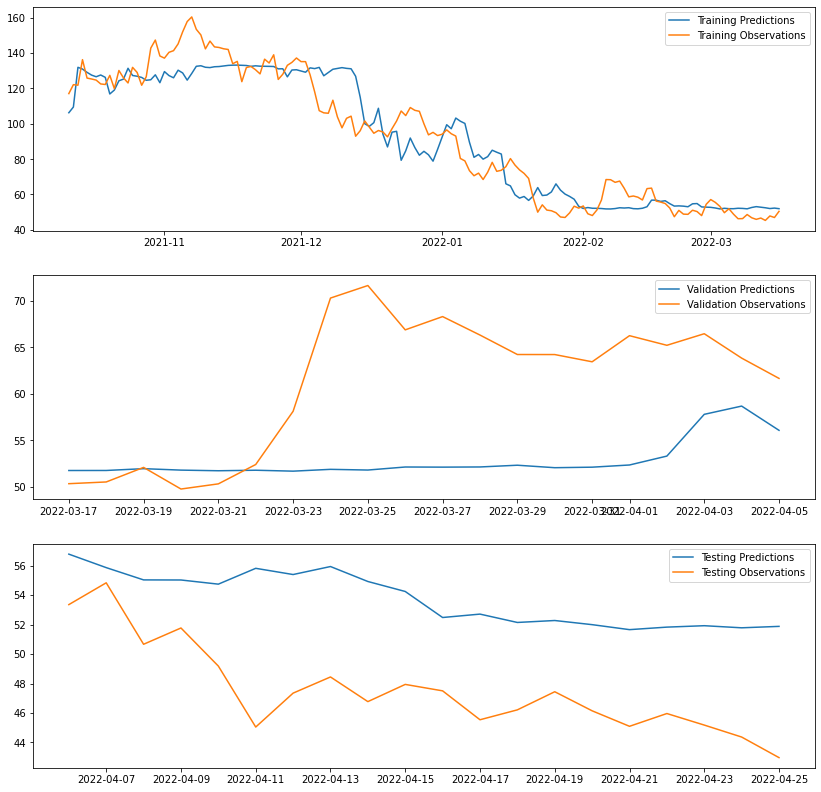

In [26]:
#PREDICT THE VALUES USING THE MODEL
train_predictions = model.predict(X_train).flatten()
val_predictions = model.predict(X_val).flatten()
test_predictions = model.predict(X_test).flatten()


fig,axs = plt.subplots(3, 1, figsize=(14,14))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].legend(['Training Predictions', 'Training Observations'])

axs[1].plot(dates_val, val_predictions)
axs[1].plot(dates_val, y_val)
axs[1].legend(['Validation Predictions', 'Validation Observations'])

axs[2].plot(dates_test, test_predictions)
axs[2].plot(dates_test, y_test)
axs[2].legend(['Testing Predictions', 'Testing Observations'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_modelPredictions'+'.png')

## <font color='#5D6D7E'>Recursive Predictions</font> <a class="anchor" id="twentysixth-bullet"></a>
  [Back to TOC](#toc)

In [27]:
from copy import deepcopy

#Get prediction for future dates recursively based on the previous existing information. Then update the window of days upon
#which the predictions are made

recursive_predictions = []
recursive_dates = np.concatenate([dates_test])

last_window = deepcopy(X_train[-1])

for target_date in recursive_dates:
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window = np.insert(last_window,0,next_prediction)[:-1]
    

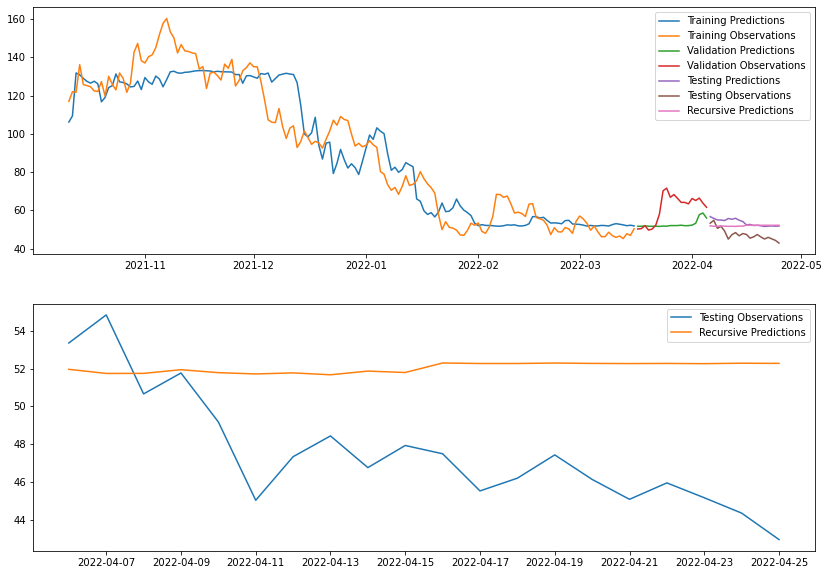

In [28]:
fig,axs = plt.subplots(2, 1, figsize=(14,10))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].plot(dates_val, val_predictions)
axs[0].plot(dates_val, y_val)
axs[0].plot(dates_test, test_predictions)
axs[0].plot(dates_test, y_test)
axs[0].plot(recursive_dates, recursive_predictions)
axs[0].legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])

axs[1].plot(dates_test, y_test)
axs[1].plot(recursive_dates, recursive_predictions)
axs[1].legend(['Testing Observations',
              'Recursive Predictions'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_recursivePredictions'+'.png')